<font color='red'>**Report Submission Information (must be completed before submitting report!)**</font>

* Student 1 Full Name and Number : Lei Qin 1048669
* Student 2 Full Name and Number : Liqing Wu 1037333
* Workshop day : Friday
* Workshop time : 2:15pm

# <font color='blue'> Workshop 2 – Machine Learning (ML) [3 weeks] </font>

## Objectives:

* Gain hands-on experience with basic machine learning paradigms.
* Familiarise yourself with some of the practical software tools used for machine learning.
* Solve basic machine learning problems using Python Scipy and Scikit-learn.
* Connect theoretical knowledge and practical usage by doing it yourself.

> __Common objectives of all workshops:__
> Gain hands-on experience and learn by doing! Understand how theoretical knowledge discussed in lectures relates to practice. Develop motivation for gaining further theoretical and practical knowledge beyond the subject material.

## Overview:
Optimisation is widely used in engineering (practice and research) today. That was not always so. I expect that in the future machine learning will be as prevalently used in engineering as optimisation is used today. The arguments in favour of it are (a) increasingly more powerful computing (b) lots of data (c) decreasing storage and computing costs. Machine learning benefits substantially from these trends. We will hopefully see together how engineering world will evolve in this century.

In this workshop, you will learn how to solve machine learning problems in practice and apply common algorithms to various data sets. Doing this yourself will give you a chance to connect theoretical knowledge and practical usage. We will start with simple, easy-to-visualise (2D) data sets so that concepts become clear. More interesting problems and data will be posed as open-ended (and optional) problems.

You will also familiarise yourself with machine learning libraries of Python, which is the de-facto language for ML these days. Still, the tools and data are chosen completely for educational reasons (simplicity, accessibility, cost). There are and will be better ML frameworks and more complex data sets but it is not realistic to cover all. Due to time limitations, we unfortunately do not focus on a big topic in this workshop and subject: [data science](https://study.unimelb.edu.au/find/courses/graduate/master-of-data-science/what-will-i-study/). You should not get the wrong impression from the nice, cleaned-up data sets you are given in this workshop. In real life, data is messy (as everything else!) and more than half of data science is about preparing data itself. 

> In the future, you should consider learning additional ML software packages and libraries. Finding the right tool for the right job is an important skill obtained through knowledge and experience. I would also recommend learning more about data preparation and analysis. The popular [Pandas](https://pandas.pydata.org/) library, which we briefly use, makes a good starting point.

## Workshop Preparation: 

You can start your workshop early to learn much more! We will give you a lot of time to finish the tasks but those are the bare minimums. Just like in the lectures, the topics we cover in the workshops are quite deep and we can only do so much in two hours. There is much more to learn and being prepared for the workshop is one of the best ways to gain more knowledge! For example, you can easily answer some of the initial questions in each workshop by yourself.

> __Self-learning__ is one of the most important skills that you should acquire as a student. Today, self-learning is much easier than it used to be thanks to a plethora of online resources.
For this workshop, start by exploring the resource mentioned in the preparation steps below.

### Workshop Preparation Steps:

1. Common step for all workshops: read the Workshop Manual (Jupyter Notebook) beforehand!
2. Review relevant lecture slides on machine learning.
3. Read/check relevant reading material and links from Canvas
4. Check the embedded links below hints and background.
5. _\[optional\]_ _You can start with workshop tasks and questions_

### Additional packages to install

In this workshop, we will use the [_Regressors_](https://regressors.readthedocs.io/en/latest/) package for convenience for couple of minor things. You can [install the package](https://regressors.readthedocs.io/en/latest/installation.html) simply by using

```pip install regressors``` 

from within the Anaconda environment. Ask for help from your demonstrator in case you need it.



## Tasks and Questions:

Follow the procedures described below, perform the given tasks and answer the workshop questions __on the Python notebook itself!__ The marks associated with each question are clearly stated. Keep your answers to the point and complete to get full marks! Ensure that your code is clean and appropriately commented. 

__The resulting notebook will be your Workshop Report!__

> __The goal is to learn__, NOT blindly follow the procedures in the fastest possible way! __Do not simply copy-paste answers (from Internet, friends, etc.). You can and should use all available resources but only to develop your own understanding. If you copy-paste, you will pay the price in the final exam!__

**This workshop has 50 points.** *There is no bonus question in this workshop. If you finish it early, the next one will be available for you start to working on.*

# Section 1: Linear Regression, Overfitting, and Regularisation

## 1.1 _Example_. Using curve fitting to model Diode characteristics.

![Diode characteristic](img/diode.png)

The diagram above shows the I-V curve of a [diode](https://en.wikipedia.org/wiki/Diode) widely used in electronic circuits, see [1N4001-D spec sheet (right click to download)](1N4001-D.pdf).

We can use regression to model the I-V curve of this diode at 25 degrees C. 

Using the nice tool, [WebPlotDigitizer](https://automeris.io/WebPlotDigitizer/), a small and clean data set is generated and stored in [csv format](https://en.wikipedia.org/wiki/Comma-separated_values). We now use the famous [pandas library](https://pandas.pydata.org/) to read the *csv* file.

In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib

dataset=pd.read_csv('files/diode_dataset.csv', names=['Vf', 'If'])
# Note that if you don't put names to csv or into the function as above, 
# pandas ignores the first row in calculations!
dataset.head()

,Vf,If
0,0.794737,0.100714
1,0.801316,0.111255
2,0.806579,0.127593
3,0.811842,0.140954
4,0.815789,0.153793


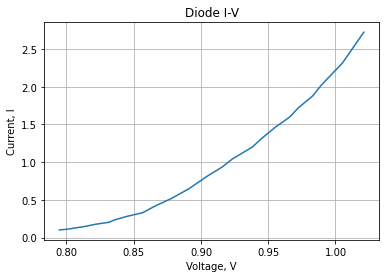

In [22]:
plt.figure()
plt.plot(dataset.values[:,0], dataset.values[:,1])
plt.xlabel('Voltage, V')
plt.ylabel('Current, I')
plt.title('Diode I-V')
plt.grid()
plt.show()

_Note that the figure above is convex but the one above was looking concave! Can you see why?_

### Question 1.1 (10 pts)

Let us consider the linear model $I=f(V)=a+bV$, for $a, b \in \mathbb{R}$ for simplicity.

We can find the best $(a, b)$ that minimise the error between the $N$ data points $(I_j, V_j)$ and this linear model by solving the optimisation problem 

$$\min_{a, b} \sum_{j=1}^N (I_j- (a + b V_j))^2 $$

This is equivalent *in spirit* to what the machine learning libraries such as *sklearn (scikit-learn)* do to solve this problem! As you will repeatedly see, there is a deep and close relationship between optimisation and many learning methods.

1. Find the $a, b$ by solving the unconstrained optimisation problem above using e.g. *pyomo*. Using the formula and the parameters, $a, b$, you derived, plot the linear I-V curve with the additional constraint $I \geq 0$ or $\max(I, 0)$.
2. First fit a [linear model](https://scikit-learn.org/stable/modules/linear_model.html) using "linear_model.LinearRegression()". Plot the result, find the coefficients, and calculate the mean square error (MSE).
3. Next fit a [polynomial model](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions) of second degree, i.e. a quadratic model. Plot the model, find the coefficients, and calculate MSE. Interpret and discuss the results.
4. Add a regularisation term, i.e use [ridge regression](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression). Do you observe an improvement? Discuss.
5. Try couple of higher order models (e.g. 4, 6) without regularisation, and provide the results as before. What do you observe when you compare the coefficients? Find [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html) and training errors for the models and discuss/interpret your results.

#### Hints
1. you will need to use [pipelines](https://scikit-learn.org/stable/modules/compose.html#pipeline). To access coefficients use model.named_steps['linearregression'].coef_  or model.named_steps['ridge'].coef_
2. the train_test_split function provides a very convenient way of shuffling the data and dividing it into  training and test sets (3:1 default ratio), see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [23]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Set a random seed as you did in optimisation workshop by uncommenting the line below!
np.random.seed(3698557)

# full data in correct form for sklearn
Vfulldata = np.array(dataset.values[:,0]).reshape(-1,1) # reshape needed for sklearn functions
Ifulldata = np.array(dataset.values[:,1]).reshape(-1,1)

# split into training and test sets
Vtrain, Vtest, Itrain, Itest = train_test_split(Vfulldata, Ifulldata)

1. The linear I-V curve with the additional constraint $I \ge 0$  or  max($I$,0) is shown below.
2. The plot of a linear model is shown below. <br/>
coefficients: a = −8.691268, b =10.714560 <br/>
𝐼 = −8.691268+10.714560 $\cdot$ 𝑉 <br/>
MSE $_{𝑡𝑟𝑎𝑖𝑛}$ = 0.034919 <br/>
MSE $_{𝑡𝑒𝑠𝑡}$ = 0.024160 <br/>
3. The plot of a polynomial model of second degree is shown below. <br/>
coefficients: a =26.730245, b =−68.396370, c =43.902061 <br/>
𝐼 = 26.730245 −68.396370 $\cdot$ 𝑉 + 43.902061 $\cdot V^2$ <br/>
MSE $_{𝑡𝑟𝑎𝑖𝑛}$ = 0.000461 <br/>
MSE $_{𝑡𝑒𝑠𝑡}$ = 0.000350 <br/>
It can be seen from the mean square error (MSE) that the quadratic model fits the I-V model more accurately with a smaller error than the linear model. 
4. The plot adding a regularisation term is shown below. <br/>
coefficients: a = −3.527258, b = 0.804464, c = 4.606267 <br/>
𝐼 = −3.527258 + 0.804464 $\cdot$ 𝑉 + 4.606267 $\cdot V^2$ <br/>
MSE $_{𝑡𝑟𝑎𝑖𝑛}$ = 0.052347 <br/>
MSE $_{𝑡𝑒𝑠𝑡}$ = 0.017422 <br/>
After adding a regularisation term, the coefficients get smaller, but the mean square error (MSE) gets larger. This is because the previous model does well already, so the regularisation term 
5. The plot of polynomial models(order = 4, 6) is shown below. <br/>
order = 4: <br/>
coefficients: a = 389.119518, b = −1673.352317, c = 2701.367920, d = −1949.652611, e = 534.724357 <br/>
𝐼 = 389.119518 − 1673.352317 $\cdot$ 𝑉 + 2701.367920 $\cdot V^2$ −1949.652611 $\cdot V^3$ + 534.724357 $\cdot V^4$ <br/> 
Cross-validation score = 0.998677 <br/>
MSE $_{𝑡𝑟𝑎𝑖𝑛}$ = 0.000159 <br/>
MSE $_{𝑡𝑒𝑠𝑡}$ = 0.000368 <br/>
order = 6: <br/>
coefficients: a = −62009.284229, b = 408405.922827, c = −1118108.472423, d = 1628753.923723 , e = −1331516.184247, f = 579223.408224, g = −104747.104102  <br/>
𝐼 = −62009.284229+408405.922827 $\cdot$ 𝑉 −1118108.472423 $\cdot V^2$ + 1628753.923723 $\cdot V^3$−1331516.184247 $\cdot V^4$ +579223.408224 $\cdot V^5$ −104747.104102 $\cdot V^6$<br/> 
Cross-validation score = 0.999460  <br/>
MSE $_{𝑡𝑟𝑎𝑖𝑛}$ = 0.000069 <br/>
MSE $_{𝑡𝑒𝑠𝑡}$ = 0.000163 <br/>
The coefficients are really large.

$Question\;1.1.1$

a -8.691267803430165
b 10.714559790870089
obj 0.7726144097041545


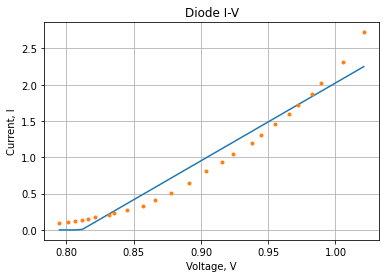

$Question\;1.1.2$

a $ = -9.092710$

b $ = 11.155759$

$I = -9.092710 + 11.155759 \cdot V$

MSE $_{train} = 0.034919$

MSE $_{test} = 0.024160$

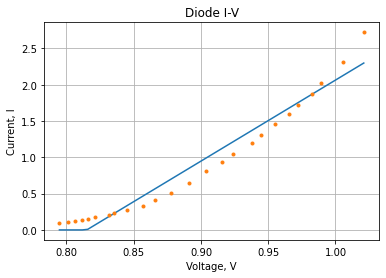

$Question\;1.1.3$

a $ = 27.038396$

b $ = -69.052674$

c $ = 44.248340$

$I = 27.038396 + (-69.052674) \cdot V + 44.248340 \cdot V^2$

MSE $_{train} = 0.000461$

MSE $_{test} = 0.000350$

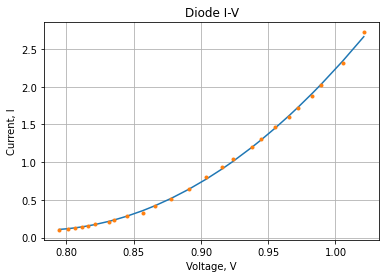

$Question\;1.1.4$

a $ = -3.404514$

b $ = 0.804302$

c $ = 4.489816$

$I = -3.404514 + 0.804302 \cdot V + 4.489816 \cdot V^2$

MSE $_{train} = 0.052347$

MSE $_{test} = 0.017422$

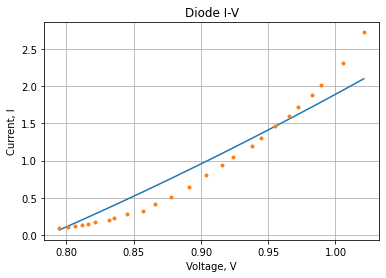

$Question\;1.1.5$

order $ = 4$

a $ = 589.762528$

b $ = -2592.896720$

c $ = 4277.903033$

d $ = -3148.041253$

e $ = 875.500405$

$I = 589.762528 + (-2592.896720) \cdot V + 4277.903033 \cdot V^2 + (-3148.041253) \cdot V^3 + 875.500405 \cdot V^4$

Cross-validation score $=$

[0.99923743 0.99543365 0.99957237 0.9970445  0.99625637]


MSE $_{train} = 0.000162$

MSE $_{test} = 0.000294$

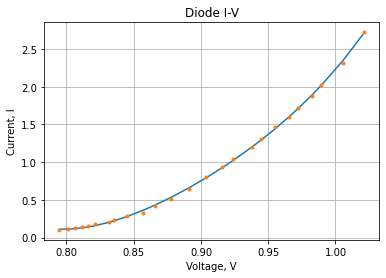

order $ = 6$

a $ = -15054.442121$

b $ = 93302.698172$

c $ = -238358.872611$

d $ = 320744.966396$

e $ = -239235.773752$

f $ = 93477.711767$

g $ = -14874.075156$

$I = -15054.442121 + 93302.698172 \cdot V + (-238358.872611) \cdot V^2 + 320744.966396 \cdot V^3 + (-239235.773752) \cdot V^4 + 93477.711767 \cdot V^5 + (-14874.075156) \cdot V^6$

Cross-validation score $=$

[0.9998097  0.99682707 0.99948401 0.97268524 0.99862417]


MSE $_{train} = 0.000055$

MSE $_{test} = 0.000146$

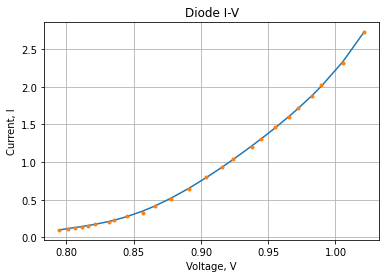

In [24]:
import pyomo.environ as pyo
from IPython.display import Markdown, display
from sklearn.model_selection import cross_val_score

diodeDataSet = pd.read_csv('files/diode_dataset.csv', names=['Vf', 'If'])
# Note that if you don't put names to csv or into the function as above,
# pandas ignores the first row in calculations!
diodeDataSet.head()  # use .name[] to call data set


## Problem 1.1.1
display(Markdown(r"$Question\;1.1.1$"))

# A I-V linear regression unconstrained optimisation program
model = pyo.AbstractModel()
model.name = 'Diode'

# Note variables
N = len(diodeDataSet)
model.a = pyo.Var()
model.b = pyo.Var()


# Define model and constrains
def Diode(model):
    return sum((diodeDataSet.If[j] - (model.a + model.b * diodeDataSet.Vf[j])) ** 2 for j in range(N))


model.obj = pyo.Objective(rule=Diode, sense=pyo.minimize)

# Create an instance of the problem
diode = model.create_instance()

# Define solver
opt = pyo.SolverFactory('ipopt')

# Show results
opt.solve(diode)


def disp_soln(instance):
    output = []
    for v in instance.component_data_objects(pyo.Var, active=True):
        output.append(pyo.value(v))
        print(v, pyo.value(v))
    print(instance.obj, pyo.value(instance.obj))
    output.append(pyo.value(instance.obj))
    return output


# Display results
results = disp_soln(diode)
a = results[0]
b = results[1]

# Plot the new linear I-V curve
V = diodeDataSet.Vf
I = a + b * V
plt.figure()
plt.plot(V[:], np.maximum(I[:], 0))
plt.plot(diodeDataSet.Vf, diodeDataSet.If, '.')
plt.xlabel('Voltage, V')
plt.ylabel('Current, I')
plt.title('Diode I-V')
plt.grid()
plt.show()
######################################################################################################################



######################################################################################################################
## Problem 1.1.2
display(Markdown(r"$Question\;1.1.2$"))

# Full data in correct form for sklearn
Vfulldata = np.array(diodeDataSet.values[:, 0]).reshape(-1, 1)  # reshape needed for sklearn functions
Ifulldata = np.array(diodeDataSet.values[:, 1]).reshape(-1, 1)

# Linear regression
reg = linear_model.LinearRegression().fit(Vtrain, Itrain)

# Display results
a = reg.intercept_
b = reg.coef_

ItrainPredict = reg.predict(Vtrain)
ItestPredict = reg.predict(Vtest)
mse_train = mean_squared_error(Itrain, ItrainPredict)
mse_test = mean_squared_error(Itest, ItestPredict)
display(Markdown(r"a $ = %f$"%(a)))
display(Markdown(r"b $ = %f$"%(b)))
display(Markdown(r"$I = %f + %f \cdot V$"%(a, b)))
display(Markdown(r"MSE $_{train} = %f$"%(mse_train)))
display(Markdown(r"MSE $_{test} = %f$"%(mse_test)))

# Plot the new linear I-V curve
V = Vfulldata
I = reg.predict(V)
plt.figure()
plt.plot(V, np.maximum(I, 0))
plt.plot(Vfulldata, Ifulldata, '.')
plt.xlabel('Voltage, V')
plt.ylabel('Current, I')
plt.title('Diode I-V')
plt.grid()
plt.show()
######################################################################################################################



######################################################################################################################
## Problem 1.1.3
display(Markdown(r"$Question\;1.1.3$"))

# Transforms an input data matrix into a new data matrix of a given degree
# Built using a list of (key, value) pairs, where the key is a string containing the name you want to give this step 
# and value is an estimator object 
model = make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression(fit_intercept=False))

# Fit to an order-2 polynomial data
model = model.fit(Vtrain, Itrain)

# Display results
a = model.named_steps.linearregression.coef_[0, 0]
b = model.named_steps.linearregression.coef_[0, 1]
c = model.named_steps.linearregression.coef_[0, 2]
ItrainPredict = model.predict(Vtrain)
ItestPredict = model.predict(Vtest)
mse_train = mean_squared_error(Itrain, ItrainPredict)
mse_test = mean_squared_error(Itest, ItestPredict)
display(Markdown(r"a $ = %f$"%(a)))
display(Markdown(r"b $ = %f$"%(b)))
display(Markdown(r"c $ = %f$"%(c)))
display(Markdown(r"$I = %f + (%f) \cdot V + %f \cdot V^2$"%(a, b, c)))
display(Markdown(r"MSE $_{train} = %f$"%(mse_train)))
display(Markdown(r"MSE $_{test} = %f$"%(mse_test)))


# Plot the new linear I-V curve
V = Vfulldata
I = model.predict(V)
plt.figure()
plt.plot(V[:], np.maximum(I[:], 0)[:])
plt.plot(Vfulldata, Ifulldata, '.')
plt.xlabel('Voltage, V')
plt.ylabel('Current, I')
plt.title('Diode I-V')
plt.grid()
plt.show()
######################################################################################################################



######################################################################################################################
## Problem 1.1.4
display(Markdown(r"$Question\;1.1.4$"))

# Transforms an input data matrix into a new data matrix of a given degree
# Built using a list of (key, value) pairs, where the key is a string containing the name you want to give this step
# and value is an estimator object
model = make_pipeline(PolynomialFeatures(degree=2), linear_model.Ridge(alpha=0.05, fit_intercept=False))

# Fit to an order-2 polynomial data
model = model.fit(Vtrain, Itrain)

# Display results
a = model.named_steps.ridge.coef_[0, 0]
b = model.named_steps.ridge.coef_[0, 1]
c = model.named_steps.ridge.coef_[0, 2]
ItrainPredict = model.predict(Vtrain)
ItestPredict = model.predict(Vtest)
mse_train = mean_squared_error(Itrain, ItrainPredict)
mse_test = mean_squared_error(Itest, ItestPredict)
display(Markdown(r"a $ = %f$"%(a)))
display(Markdown(r"b $ = %f$"%(b)))
display(Markdown(r"c $ = %f$"%(c)))
display(Markdown(r"$I = %f + %f \cdot V + %f \cdot V^2$"%(a, b, c)))
display(Markdown(r"MSE $_{train} = %f$"%(mse_train)))
display(Markdown(r"MSE $_{test} = %f$"%(mse_test)))

# Plot the new linear I-V curve
V = Vfulldata
I = model.predict(V)
plt.figure()
plt.plot(V[:], np.maximum(I[:], 0)[:])
plt.plot(Vfulldata, Ifulldata, '.')
plt.xlabel('Voltage, V')
plt.ylabel('Current, I')
plt.title('Diode I-V')
plt.grid()
plt.show()
######################################################################################################################



######################################################################################################################
## Problem 1.1.5
display(Markdown(r"$Question\;1.1.5$"))

# Split into training and test sets
Vtrain, Vtest, Itrain, Itest = train_test_split(Vfulldata, Ifulldata, test_size=0.4, random_state=3698557)

## Order = 4
# Transforms an input data matrix into a new data matrix of a given degree
# Built using a list of (key, value) pairs, where the key is a string containing the name you want to give this step
# and value is an estimator object
model = make_pipeline(PolynomialFeatures(degree=4), linear_model.LinearRegression(fit_intercept=False))

# Fit to an order-4 polynomial data
model = model.fit(Vtrain, Itrain)

# Cross-validation score
scores = cross_val_score(model, Vtrain, Itrain)

# Display results
a = model.named_steps.linearregression.coef_[0, 0]
b = model.named_steps.linearregression.coef_[0, 1]
c = model.named_steps.linearregression.coef_[0, 2]
d = model.named_steps.linearregression.coef_[0, 3]
e = model.named_steps.linearregression.coef_[0, 4]
ItrainPredict = model.predict(Vtrain)
ItestPredict = model.predict(Vtest)
mse_train = mean_squared_error(Itrain, ItrainPredict)
mse_test = mean_squared_error(Itest, ItestPredict)
display(Markdown(r"order $ = 4$"))
display(Markdown(r"a $ = %f$"%(a)))
display(Markdown(r"b $ = %f$"%(b)))
display(Markdown(r"c $ = %f$"%(c)))
display(Markdown(r"d $ = %f$"%(d)))
display(Markdown(r"e $ = %f$"%(e)))
display(Markdown(r"$I = %f + (%f) \cdot V + %f \cdot V^2 + (%f) \cdot V^3 + %f \cdot V^4$"%(a, b, c, d, e)))
display(Markdown(r"Cross-validation score $=$"))
print(scores)
display(Markdown(r"MSE $_{train} = %f$"%(mse_train)))
display(Markdown(r"MSE $_{test} = %f$"%(mse_test)))

# Plot the new linear I-V curve
V = Vfulldata
I = model.predict(V)
plt.figure()
plt.plot(V[:], np.maximum(I[:], 0)[:])
plt.plot(Vfulldata, Ifulldata, '.')
plt.xlabel('Voltage, V')
plt.ylabel('Current, I')
plt.title('Diode I-V')
plt.grid()
plt.show()

## Order = 6
# Transforms an input data matrix into a new data matrix of a given degree
# Built using a list of (key, value) pairs, where the key is a string containing the name you want to give this step
# and value is an estimator object
model = make_pipeline(PolynomialFeatures(degree=6), linear_model.LinearRegression(fit_intercept=False))

# Fit to an order-6 polynomial data
model = model.fit(Vtrain, Itrain)

# Cross-validation score
scores = cross_val_score(model, Vtrain, Itrain)

# Display results
a = model.named_steps.linearregression.coef_[0, 0]
b = model.named_steps.linearregression.coef_[0, 1]
c = model.named_steps.linearregression.coef_[0, 2]
d = model.named_steps.linearregression.coef_[0, 3]
e = model.named_steps.linearregression.coef_[0, 4]
f = model.named_steps.linearregression.coef_[0, 5]
g = model.named_steps.linearregression.coef_[0, 6]
ItrainPredict = model.predict(Vtrain)
ItestPredict = model.predict(Vtest)
mse_train = mean_squared_error(Itrain, ItrainPredict)
mse_test = mean_squared_error(Itest, ItestPredict)
display(Markdown(r"order $ = 6$"))
display(Markdown(r"a $ = %f$"%(a)))
display(Markdown(r"b $ = %f$"%(b)))
display(Markdown(r"c $ = %f$"%(c)))
display(Markdown(r"d $ = %f$"%(d)))
display(Markdown(r"e $ = %f$"%(e)))
display(Markdown(r"f $ = %f$"%(f)))
display(Markdown(r"g $ = %f$"%(g)))
display(Markdown(
    r"$I = %f + %f \cdot V + (%f) \cdot V^2 + %f \cdot V^3 + (%f) \cdot V^4 + %f \cdot V^5 + (%f) \cdot V^6$" % (
    a, b, c, d, e, f, g)))
display(Markdown(r"Cross-validation score $=$"))
print(scores)
display(Markdown(r"MSE $_{train} = %f$"%(mse_train)))
display(Markdown(r"MSE $_{test} = %f$"%(mse_test)))

# Plot the new linear I-V curve
V = Vfulldata
I = model.predict(V)
plt.figure()
plt.plot(V[:], np.maximum(I[:], 0)[:])
plt.plot(Vfulldata, Ifulldata, '.')
plt.xlabel('Voltage, V')
plt.ylabel('Current, I')
plt.title('Diode I-V')
plt.grid()
plt.show()

# Section 2: Clustering and Gaussian Mixtures

Unsupervised learning is all about data. We will use first the famous two moon data set to practice a little bit and digest some of the fundemental concepts. Since two moons data inherently has two clusters (each moon as a cluster), we can use this as a [ground truth](https://en.wikipedia.org/wiki/Ground_truth). In most real problems, we don't have this luxury of having the ground truth at hand! 

**Note** that Scikit Learn does not have its own global random state but uses the [numpy random state](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html#numpy.random.seed) instead. See the code below.

### Important Note on Random Number/Vector Generation

**Each group has to use a different number seed (which is an arbitrary number as illustrated above) and groups cannot share seeds. The pseudo-randomness is used here to create diversity. Otherwise, if groups use the same seed, the results will be the same (opening the door to plagiarism) and significant number of points will be taken off! As a practical hint, you can use a modified-combination of your student numbers**

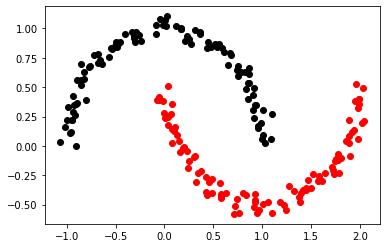

In [25]:
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn import decomposition
from sklearn.mixture import GaussianMixture
from sklearn import metrics

# Set a random seed as you did in optimisation workshop by uncommenting the line below!
np.random.seed(3698557)

noisy_moons = datasets.make_moons(n_samples=200, noise=0.05)
X = noisy_moons[0] # data points
y = noisy_moons[1] # 0, 1 labels of class, 50 each - giving us the ground truth

order_ind = np.argsort(y) # order labels, 50 each class
X1 = X[order_ind[0:100]]   # class 1
X2 = X[order_ind[101:200]] # class 2

# Plot data
plt.figure()
plt.scatter(X1[:,0], X1[:,1], color='black')
plt.scatter(X2[:,0], X2[:,1], color='red')
plt.show()

### Question 2.1.  K-means clustering (4 pts)

1. Use sklearn (scikit-learn) k-means clustering algorithm to divide the two moon data given above (X) into two clusters. Plot the result and show the cluster centres that you found.
2. Experiment with different starting points (init='random') and number of clusters, e.g. 3, 4, 5. Write your observations and interpret them using your theoretical knowledge from lectures and books.

$Question\;2.1.1$

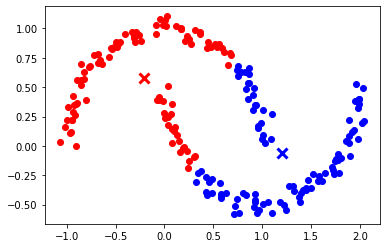

$Question\;2.1.2$

Change starting points:

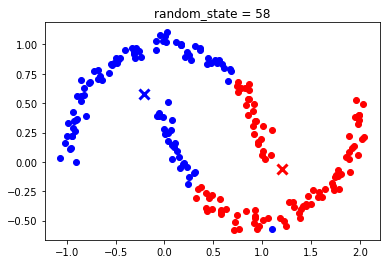

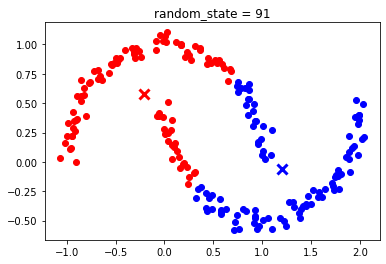

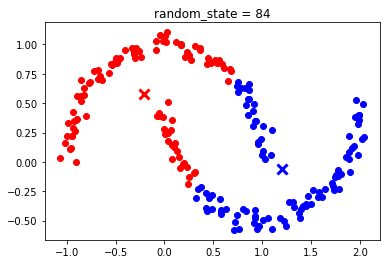

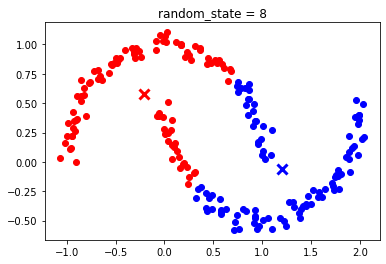

Change number of clusters:

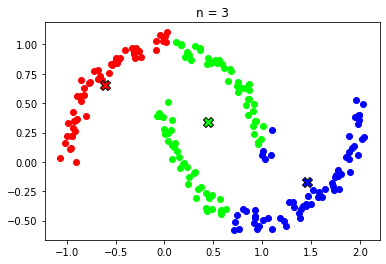

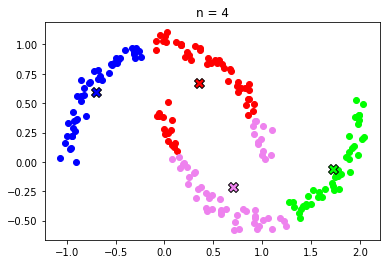

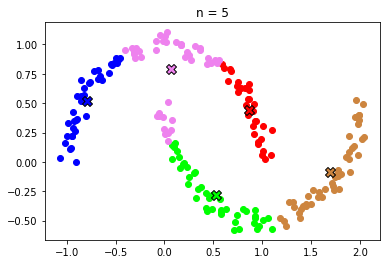

In [26]:
## Problem 2.1.1
display(Markdown(r"$Question\;2.1.1$"))

# Use k-means clustering algorithm to divide the two moon data given above (X) into two clusters
kmeans = KMeans(n_clusters=2).fit(X)
cluster_centres_X1 = kmeans.cluster_centers_[0]
cluster_centres_X2 = kmeans.cluster_centers_[1]

y = kmeans.labels_  # 0, 1 labels of class, 50 each
order_ind = np.argsort(y)  # order labels, 50 each class
X1 = X[order_ind[0:100]]  # class 1
X2 = X[order_ind[101:200]]  # class 2

# Plot data
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], color='blue')
plt.scatter(X2[:, 0], X2[:, 1], color='red')
plt.scatter(cluster_centres_X1[0], cluster_centres_X1[1], color='blue', marker='x', s=100, edgecolor='black',
            linewidth=3)
plt.scatter(cluster_centres_X2[0], cluster_centres_X2[1], color='red', marker='x', s=100, edgecolor='black',
            linewidth=3)
plt.show()
######################################################################################################################




######################################################################################################################
import random
## Problem 2.1.2
display(Markdown(r"$Question\;2.1.2$"))
display(Markdown(r"Change starting points:"))

# Use k-means clustering algorithm to divide the two moon data given above (X) into two clusters
# Change starting points (init='random')
randomlist = random.sample(range(0, 100), 4)
for k in range(4):
    kmeans = KMeans(init='random', n_clusters=2, random_state=randomlist[k]).fit(X)
    cluster_centres_X1 = kmeans.cluster_centers_[0]
    cluster_centres_X2 = kmeans.cluster_centers_[1]

    y = kmeans.labels_  # 0, 1 labels of class, 50 each
    order_ind = np.argsort(y)  # order labels, 50 each class
    X1 = X[order_ind[0:100]]  # class 1
    X2 = X[order_ind[101:200]]  # class 2

    # Plot data
    plt.figure()
    plt.title('random_state = %d' % randomlist[k])
    plt.scatter(X1[:, 0], X1[:, 1], color='blue')
    plt.scatter(X2[:, 0], X2[:, 1], color='red')
    plt.scatter(cluster_centres_X1[0], cluster_centres_X1[1], color='blue', marker='x', s=100, edgecolor='black',
            linewidth=3)
    plt.scatter(cluster_centres_X2[0], cluster_centres_X2[1], color='red', marker='x', s=100, edgecolor='black',
            linewidth=3)
    plt.show()
    
    
display(Markdown(r"Change number of clusters:"))

# Use k-means clustering algorithm to divide the two moon data given above (X) into two clusters
# Change number of clusters
# n = 3
kmeans = KMeans(n_clusters=3).fit(X)
cluster_centres_X1 = kmeans.cluster_centers_[0]
cluster_centres_X2 = kmeans.cluster_centers_[1]
cluster_centres_X3 = kmeans.cluster_centers_[2]

y = kmeans.labels_  # 0, 1 labels of class, 50 each
index_X1 = np.where(y == 0)
index_X2 = np.where(y == 1)
index_X3 = np.where(y == 2)
X1 = X[index_X1]  # class 1
X2 = X[index_X2]  # class 2
X3 = X[index_X3]  # class 3

# Plot data
plt.figure()
plt.title('n = 3')
plt.scatter(X1[:, 0], X1[:, 1], color='blue')
plt.scatter(X2[:, 0], X2[:, 1], color='red')
plt.scatter(X3[:, 0], X3[:, 1], color='lime')
plt.scatter(cluster_centres_X1[0], cluster_centres_X1[1], color='blue', marker='X', s=100, edgecolor='black',
            linewidth=1)
plt.scatter(cluster_centres_X2[0], cluster_centres_X2[1], color='red', marker='X', s=100, edgecolor='black',
            linewidth=1)
plt.scatter(cluster_centres_X3[0], cluster_centres_X3[1], color='lime', marker='X', s=100, edgecolor='black',
            linewidth=1)
plt.show()


# n = 4
kmeans = KMeans(n_clusters=4).fit(X)
cluster_centres_X1 = kmeans.cluster_centers_[0]
cluster_centres_X2 = kmeans.cluster_centers_[1]
cluster_centres_X3 = kmeans.cluster_centers_[2]
cluster_centres_X4 = kmeans.cluster_centers_[3]

y = kmeans.labels_  # 0, 1 labels of class, 50 each
index_X1 = np.where(y == 0)
index_X2 = np.where(y == 1)
index_X3 = np.where(y == 2)
index_X4 = np.where(y == 3)
X1 = X[index_X1]  # class 1
X2 = X[index_X2]  # class 2
X3 = X[index_X3]  # class 3
X4 = X[index_X4]  # class 4

# Plot data
plt.figure()
plt.title('n = 4')
plt.scatter(X1[:, 0], X1[:, 1], color='blue')
plt.scatter(X2[:, 0], X2[:, 1], color='red')
plt.scatter(X3[:, 0], X3[:, 1], color='lime')
plt.scatter(X4[:, 0], X4[:, 1], color='violet')
plt.scatter(cluster_centres_X1[0], cluster_centres_X1[1], color='blue', marker='X', s=100, edgecolor='black',
            linewidth=1)
plt.scatter(cluster_centres_X2[0], cluster_centres_X2[1], color='red', marker='X', s=100, edgecolor='black',
            linewidth=1)
plt.scatter(cluster_centres_X3[0], cluster_centres_X3[1], color='lime', marker='X', s=100, edgecolor='black',
            linewidth=1)
plt.scatter(cluster_centres_X4[0], cluster_centres_X4[1], color='violet', marker='X', s=100, edgecolor='black',
            linewidth=1)
plt.show()


# n = 5
kmeans = KMeans(n_clusters=5).fit(X)
cluster_centres_X1 = kmeans.cluster_centers_[0]
cluster_centres_X2 = kmeans.cluster_centers_[1]
cluster_centres_X3 = kmeans.cluster_centers_[2]
cluster_centres_X4 = kmeans.cluster_centers_[3]
cluster_centres_X5 = kmeans.cluster_centers_[4]

y = kmeans.labels_  # 0, 1 labels of class, 50 each
index_X1 = np.where(y == 0)
index_X2 = np.where(y == 1)
index_X3 = np.where(y == 2)
index_X4 = np.where(y == 3)
index_X5 = np.where(y == 4)
X1 = X[index_X1]  # class 1
X2 = X[index_X2]  # class 2
X3 = X[index_X3]  # class 3
X4 = X[index_X4]  # class 4
X5 = X[index_X5]  # class 4

# Plot data
plt.figure()
plt.title('n = 5')
plt.scatter(X1[:, 0], X1[:, 1], color='blue')
plt.scatter(X2[:, 0], X2[:, 1], color='red')
plt.scatter(X3[:, 0], X3[:, 1], color='lime')
plt.scatter(X4[:, 0], X4[:, 1], color='violet')
plt.scatter(X5[:, 0], X5[:, 1], color='peru')
plt.scatter(cluster_centres_X1[0], cluster_centres_X1[1], color='blue', marker='X', s=100, edgecolor='black',
            linewidth=1)
plt.scatter(cluster_centres_X2[0], cluster_centres_X2[1], color='red', marker='X', s=100, edgecolor='black',
            linewidth=1)
plt.scatter(cluster_centres_X3[0], cluster_centres_X3[1], color='lime', marker='X', s=100, edgecolor='black',
            linewidth=1)
plt.scatter(cluster_centres_X4[0], cluster_centres_X4[1], color='violet', marker='X', s=100, edgecolor='black',
            linewidth=1)
plt.scatter(cluster_centres_X5[0], cluster_centres_X5[1], color='peru', marker='X', s=100, edgecolor='black',
            linewidth=1)
plt.show()

1. The result and the cluster centres show above. <br/>
<br/>
We can see there is a gap between these two cluster and the ground truth.<br/>
<br/>
2. When we change the starting points for 4 times, the clusters would either improve or worsen. This is because although the K-means clustering procedure improves the result in each iteration, there is no assurance that it will converge to the global best solution. <br/>
<br/>
When we change the number of clusters(n), we would get the best n clusters to divide the data as it cannot learn the number of clusters from the data. <br/>
<br/>
The basic model assumption of k-means (a point will be closer to its own cluster center than other points) means that if the cluster has a complex geometry (such as two moon data), the algorithm is usually ineffective. In particular, the boundaries between k-means clusters will always be linear, which means it will not be able to handle more complex boundaries like in this example. <br/>
<br/>
In all, K-means clustering algorithm cannot divide the two moon data into two clusters very well, so it is not suitable for two moon data clustering.

### Question 2.2.  GMM as density estimator (6 pts)

1. Now use a Gaussian mixture model (GMM) for clustering the same two moon data. Try two clusters and plot your results. GMMs also provides you probabilities (of a sample belonging to a cluster). Print those of a few samples.
2. Increase the number of components of your GMM model. What do you observe? Use a metric to choose the number of components in a principled way. *Hint: check [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion) or [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion) *
3. It is maybe better to use GMM as a **generative model**! Generate 200 brand new samples from a well functioning gmm model with your choice of parameters and plot your results. Discuss your findings!


$Question\;2.2.1$

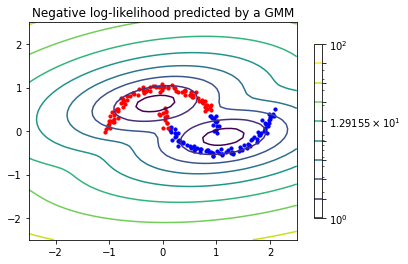

probability of point (0.525707, 0.905635) belong to cluster 1 $ = 0.000812$

probability of point (0.525707, 0.905635) belong to cluster 2 $ = 0.999188$

probability of point (-0.074170, 1.018594) belong to cluster 1 $ = 0.000011$

probability of point (-0.074170, 1.018594) belong to cluster 2 $ = 0.999989$

probability of point (0.373423, -0.241375) belong to cluster 1 $ = 0.992084$

probability of point (0.373423, -0.241375) belong to cluster 2 $ = 0.007916$

probability of point (0.208115, 0.980972) belong to cluster 1 $ = 0.000069$

probability of point (0.208115, 0.980972) belong to cluster 2 $ = 0.999931$

$Question\;2.2.2$

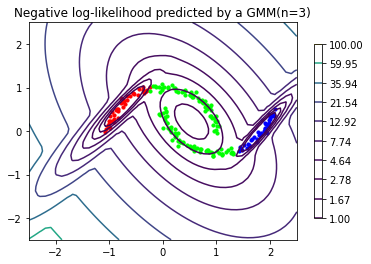

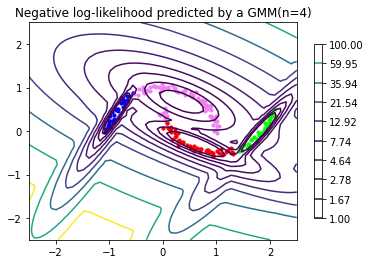

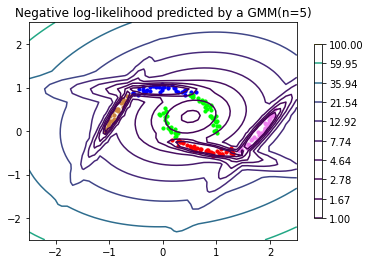

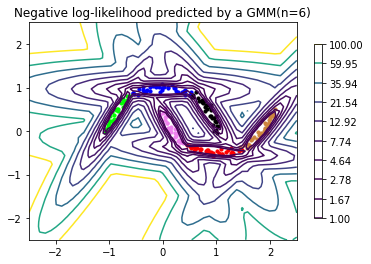

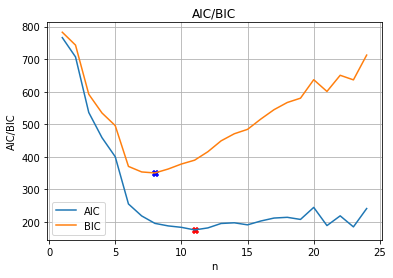

minimum of AIC: n = 11, AIC = 175.056473

minimum of BIC: n = 8, BIC = 195.160158

$Question\;2.2.3$

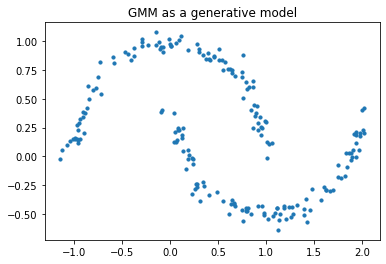

In [27]:
from matplotlib.colors import LogNorm

## Problem 2.2.1
display(Markdown(r"$Question\;2.2.1$"))

noisy_moons = datasets.make_moons(n_samples=200, noise=0.05)
X_train = noisy_moons[0]  # data points
y_train = noisy_moons[1]  # 0, 1 labels of class, 50 each - giving us the ground truth

order_ind = np.argsort(y_train)  # order labels, 50 each class
X1 = X_train[order_ind[0:100]]  # class 1
X2 = X_train[order_ind[101:200]]  # class 2

# Gaussian Mixture Models
gmm = GaussianMixture(n_components=2).fit(X_train)

# Probabilities and labels
p = gmm.predict_proba(X_train)
y = gmm.predict(X_train)

index_X1 = np.where(y == 0)
index_X2 = np.where(y == 1)

X1 = X_train[index_X1]  # class 1
X2 = X_train[index_X2]  # class 2

# display predicted scores by the model as a contour plot
x = np.linspace(-2.5, 2.5)
y = np.linspace(-2.5, 2.5)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=50.0),
                 levels=np.logspace(0, 2, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X1[:, 0], X1[:, 1], color='blue', s=10)
plt.scatter(X2[:, 0], X2[:, 1], color='red', s=10)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

display(Markdown(r"probability of point (%f, %f) belong to cluster 1 $ = %f$"%(X_train[0, 0], X_train[0, 1], p[0, 0])))
display(Markdown(r"probability of point (%f, %f) belong to cluster 2 $ = %f$"%(X_train[0, 0], X_train[0, 1], p[0, 1])))
display(Markdown(r"probability of point (%f, %f) belong to cluster 1 $ = %f$"%(X_train[5, 0], X_train[5, 1], p[5, 0])))
display(Markdown(r"probability of point (%f, %f) belong to cluster 2 $ = %f$"%(X_train[5, 0], X_train[5, 1], p[5, 1])))
display(Markdown(r"probability of point (%f, %f) belong to cluster 1 $ = %f$"%(X_train[10, 0], X_train[10, 1], p[10, 0])))
display(Markdown(r"probability of point (%f, %f) belong to cluster 2 $ = %f$"%(X_train[10, 0], X_train[10, 1], p[10, 1])))
display(Markdown(r"probability of point (%f, %f) belong to cluster 1 $ = %f$"%(X_train[15, 0], X_train[15, 1], p[15, 0])))
display(Markdown(r"probability of point (%f, %f) belong to cluster 2 $ = %f$"%(X_train[15, 0], X_train[15, 1], p[15, 1])))
######################################################################################################################



######################################################################################################################
## Problem 2.2.2
display(Markdown(r"$Question\;2.2.2$"))

order_ind = np.argsort(y_train)  # order labels, 50 each class
X1 = X_train[order_ind[0:100]]  # class 1
X2 = X_train[order_ind[101:200]]  # class 2

# Gaussian Mixture Models(n=3)
gmm = GaussianMixture(n_components=3, covariance_type="full").fit(X_train)

# Probabilities and labels
p = gmm.predict_proba(X_train)
y = gmm.predict(X_train)

index_X1 = np.where(y == 0)
index_X2 = np.where(y == 1)
index_X3 = np.where(y == 2)

X1 = X_train[index_X1]  # class 1
X2 = X_train[index_X2]  # class 2
X3 = X_train[index_X3]  # class 3

# display predicted scores by the model as a contour plot
x = np.linspace(-2.5, 2.5)
y = np.linspace(-2.5, 2.5)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, levels=np.logspace(0, 2, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X1[:, 0], X1[:, 1], color='blue', s=10)
plt.scatter(X2[:, 0], X2[:, 1], color='red', s=10)
plt.scatter(X3[:, 0], X3[:, 1], color='lime', s=10)

plt.title('Negative log-likelihood predicted by a GMM(n=3)')
plt.axis('tight')
plt.show()


# Gaussian Mixture Models(n=4)
gmm = GaussianMixture(n_components=4, covariance_type="full").fit(X_train)

# Probabilities and labels
p = gmm.predict_proba(X_train)
y = gmm.predict(X_train)

index_X1 = np.where(y == 0)
index_X2 = np.where(y == 1)
index_X3 = np.where(y == 2)
index_X4 = np.where(y == 3)

X1 = X_train[index_X1]  # class 1
X2 = X_train[index_X2]  # class 2
X3 = X_train[index_X3]  # class 3
X4 = X_train[index_X4]  # class 4

# display predicted scores by the model as a contour plot
x = np.linspace(-2.5, 2.5)
y = np.linspace(-2.5, 2.5)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, levels=np.logspace(0, 2, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X1[:, 0], X1[:, 1], color='blue', s=10)
plt.scatter(X2[:, 0], X2[:, 1], color='red', s=10)
plt.scatter(X3[:, 0], X3[:, 1], color='lime', s=10)
plt.scatter(X4[:, 0], X4[:, 1], color='violet', s=10)

plt.title('Negative log-likelihood predicted by a GMM(n=4)')
plt.axis('tight')
plt.show()


# Gaussian Mixture Models(n=5)
gmm = GaussianMixture(n_components=5, covariance_type="full").fit(X_train)

# Probabilities and labels
p = gmm.predict_proba(X_train)
y = gmm.predict(X_train)

index_X1 = np.where(y == 0)
index_X2 = np.where(y == 1)
index_X3 = np.where(y == 2)
index_X4 = np.where(y == 3)
index_X5 = np.where(y == 4)

X1 = X_train[index_X1]  # class 1
X2 = X_train[index_X2]  # class 2
X3 = X_train[index_X3]  # class 3
X4 = X_train[index_X4]  # class 4
X5 = X_train[index_X5]  # class 5

# display predicted scores by the model as a contour plot
x = np.linspace(-2.5, 2.5)
y = np.linspace(-2.5, 2.5)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, levels=np.logspace(0, 2, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X1[:, 0], X1[:, 1], color='blue', s=10)
plt.scatter(X2[:, 0], X2[:, 1], color='red', s=10)
plt.scatter(X3[:, 0], X3[:, 1], color='lime', s=10)
plt.scatter(X4[:, 0], X4[:, 1], color='violet', s=10)
plt.scatter(X5[:, 0], X5[:, 1], color='peru', s=10)

plt.title('Negative log-likelihood predicted by a GMM(n=5)')
plt.axis('tight')
plt.show()


# Gaussian Mixture Models(n=6)
gmm = GaussianMixture(n_components=6, covariance_type="full").fit(X_train)

# Probabilities and labels
p = gmm.predict_proba(X_train)
y = gmm.predict(X_train)

index_X1 = np.where(y == 0)
index_X2 = np.where(y == 1)
index_X3 = np.where(y == 2)
index_X4 = np.where(y == 3)
index_X5 = np.where(y == 4)
index_X6 = np.where(y == 5)

X1 = X_train[index_X1]  # class 1
X2 = X_train[index_X2]  # class 2
X3 = X_train[index_X3]  # class 3
X4 = X_train[index_X4]  # class 4
X5 = X_train[index_X5]  # class 5
X6 = X_train[index_X6]  # class 5

# display predicted scores by the model as a contour plot
x = np.linspace(-2.5, 2.5)
y = np.linspace(-2.5, 2.5)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, levels=np.logspace(0, 2, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X1[:, 0], X1[:, 1], color='blue', s=10)
plt.scatter(X2[:, 0], X2[:, 1], color='red', s=10)
plt.scatter(X3[:, 0], X3[:, 1], color='lime', s=10)
plt.scatter(X4[:, 0], X4[:, 1], color='violet', s=10)
plt.scatter(X5[:, 0], X5[:, 1], color='peru', s=10)
plt.scatter(X6[:, 0], X6[:, 1], color='black', s=10)

plt.title('Negative log-likelihood predicted by a GMM(n=6)')
plt.axis('tight')
plt.show()

# AIC & BIC for different n
AIC = []  # Akaike information criterion
BIC = []  # Bayesian information criterion
NoC = np.arange(1, 25, 1)  # a metric to choose the number of components

for i in NoC:
    gmm = GaussianMixture(n_components=i).fit(X_train)
    AIC.append(gmm.aic(X_train))
    BIC.append(gmm.bic(X_train))

min_AIC = AIC.index(min(AIC))
min_BIC = BIC.index(min(BIC))

plt.figure()
plt.plot(NoC, AIC)
plt.scatter(NoC[min_AIC], AIC[min_AIC], color='red', marker='X')
plt.plot(NoC, BIC)
plt.scatter(NoC[min_BIC], BIC[min_BIC], color='blue', marker='X')
plt.xlabel('n')
plt.ylabel('AIC/BIC')
plt.title('AIC/BIC')
plt.legend(['AIC', 'BIC'])
plt.grid()
plt.show()

display(Markdown(r"minimum of AIC: n = %i, AIC = %f"%(NoC[min_AIC], AIC[min_AIC])))
display(Markdown(r"minimum of BIC: n = %i, BIC = %f"%(NoC[min_BIC], AIC[min_BIC])))
######################################################################################################################



######################################################################################################################
## Problem 2.2.3
display(Markdown(r"$Question\;2.2.3$"))

# AIC & BIC for different n
IC = []  # Information criterion
NoC = np.arange(1, 25, 1)  # a metric to choose the number of components

for i in NoC:
    gmm = GaussianMixture(n_components=i).fit(X_train)
    IC.append(gmm.aic(X_train) + gmm.bic(X_train))

min_IC = IC.index(min(IC))
n = NoC[min_IC]

gmmn = GaussianMixture(n_components=n, covariance_type='full', random_state=0).fit(X_train)
X_new = gmmn.sample(n_samples=200)

# Labels
y = X_new[1]
XX = X_new[0]

index_X1 = np.where(y == 0)
index_X2 = np.where(y == 1)
index_X3 = np.where(y == 2)
index_X4 = np.where(y == 3)
index_X5 = np.where(y == 4)
index_X6 = np.where(y == 5)

X1 = XX[index_X1[0]]  # class 1
X2 = XX[index_X2[0]]  # class 2
X3 = XX[index_X3[0]]  # class 3
X4 = XX[index_X4[0]]  # class 4
X5 = XX[index_X5[0]]  # class 5
X6 = XX[index_X6[0]]  # class 6

# display generated plot
plt.figure()
plt.scatter(XX[:, 0], XX[:, 1], s=10)
plt.title('GMM as a generative model')
plt.axis('tight')
plt.show()

1. The plot of Gaussian mixture model is shown above. <br/>
probability of point (0.521239, 0.833333) belong to cluster 1 = 0.999532 <br/>
probability of point (0.521239, 0.833333) belong to cluster 2 = 0.000468 <br/>
probability of point (0.233471, 0.993388) belong to cluster 1 = 0.999990 <br/>
probability of point (0.233471, 0.993388) belong to cluster 2 = 0.000010 <br/>
probability of point (1.025148, -0.476438) belong to cluster 1 = 0.000298 <br/>
probability of point (1.025148, -0.476438) belong to cluster 2 = 0.999702 <br/>
probability of point (-0.244748, 0.939080) belong to cluster 1 = 0.999999 <br/>
probability of point (-0.244748, 0.939080) belong to cluster 2 = 0.000001 
2. The plot of Gaussian mixture model when n = 3, 4, 5 is shown above. <br/>
After we increase the number of components of the GMM model, AIC shows that 20 or more components we selected may be too much: about around 16 components would be a better choice; BIC shows that around 7 components are more effective. This choice of number of components measures how well GMM works as a density estimator, not how well it works as a clustering algorithm. 
3. It can be inferred from this that if we use more suitable components instead and ignore the cluster labels, we can find a fit closer to the input data. From using GMM as a generative model, we can find that mixing more Gaussians is not to find individual data clusters, but to model the overall distribution of the input data meaning that the GMM gives us the recipe to generate new random data distributed similarly to our input.

# Section 3: PCA and Simple Classification

It is time to move beyond the toy data set. The next data set is still small and clean but is more interesting!

## 3.1 _Example_. Wireless Indoor Localization

The next data set shows the recorded signal strength from 7 different base stations at a smart phone. The phone is in one of the four rooms {1, 2, 3, 4}. The goal is to classify the location of the phone to one of the four rooms.

This [dataset](http://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization) was used in the following publications:
> * Jayant G Rohra, Boominathan Perumal, Swathi Jamjala Narayanan, Priya Thakur, and Rajen B Bhatt, 'User Localization in an Indoor Environment Using Fuzzy Hybrid of Particle Swarm Optimization & Gravitational Search Algorithm with Neural Networks', in Proceedings of Sixth International Conference on Soft Computing for Problem Solving,2017, pp. 286-295.
> * Rajen Bhatt, 'Fuzzy-Rough Approaches for Pattern Classification: Hybrid measures, Mathematical analysis, Feature selection algorithms, Decision tree algorithms, Neural learning, and Applications', Amazon Books 


In [28]:
dataw = pd.read_csv('files/wifi_localization.csv', names=[f"s{i}" for i in range(1, 8)] + ['Room Number'])
dataw.head() # comment one to see the other
dataw.tail()

,s1,s2,s3,s4,s5,s6,s7,Room Number
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4
1999,-59,-50,-45,-60,-45,-88,-87,4


In [29]:
print(dataw.size, dataw.shape)

16000 (2000, 8)


In [30]:
SRI = dataw.iloc[:,:7]
# a.shape
loc = dataw.iloc[:,7]-1 
# loc.shape

# split into training and test sets
SRItrain, SRItest, loctrain, loctest = train_test_split(SRI, loc)

### Question 3.1.  Clustering-based classification (6 pts)

1.  (2 pts) Use Kmeans clustering on training data to find the 4 cluster corresponding to the rooms. Then, test their quality using a [mutual information based score.](https://scikit-learn.org/stable/modules/clustering.html#mutual-information-based-scores) 
2.  (2 pts) Conduct a [PCA analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on the data with 2, 3, 4 features: find singular values, variance ratios, and plot in 2D or 3D (for 2 or 3 features). What is the number of features that balances information and complexity? Is there redundancy in data? Discuss.
3. (1 pt) Now, repeat Kmeans clustering with the PCA-transformed data. Do you see an improvement in scores? Why or why not? Discuss, based on your knowledge of PCA and Kmeans clustering. 
4. (1 pt) What information does Kmeans ignore when used for classification? Is what we do a good classification method? What can you say about the complexity of the problem given?

$Question\;3.1.1$

Mutual Information based scores of train = 0.897502

Mutual Information based scores of test = 0.870565

$Question\;3.1.2$

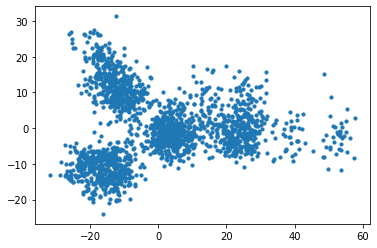

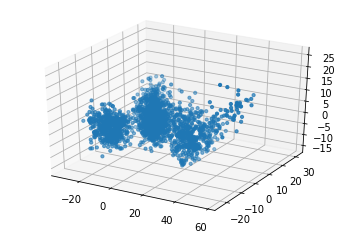

For 2 features, singular values $ = [782.994435, 430.962669]$, variance ratios $ = [0.655879, 0.198694]$ .

For 3 features, singular values $ = [782.994435, 430.962669, 214.950693]$, variance ratios $ = [0.655879, 0.198694, 0.049429]$ .

For 4 features, singular values $ = [782.994435, 430.962669, 214.950693, 168.291481]$, variance ratios $ = [0.655879, 0.198694, 0.049429, 0.030299]$ .

$Question\;3.1.3$

For 2 features, Mutual Information based scores of train = 0.891093

For 2 features, Mutual Information based scores of test = 0.863990

For 2 features, cumulative variance = 0.854573

For 3 features, Mutual Information based scores of train = 0.908109

For 3 features, Mutual Information based scores of test = 0.882134

For 3 features, cumulative variance = 0.904003

For 4 features, Mutual Information based scores of train = 0.889271

For 4 features, Mutual Information based scores of test = 0.872275

For 4 features, cumulative variance = 0.934302

In [31]:
from sklearn.decomposition import PCA

## Problem 3.1.1
display(Markdown(r"$Question\;3.1.1$"))

# Use k-means clustering algorithm to divide the two moon data given above (X) into two clusters

kmeans = KMeans(n_clusters=4).fit(SRItrain)
loctrainpred = kmeans.labels_
loctestpred = kmeans.fit_predict(SRItest)
MIBS_train = metrics.adjusted_mutual_info_score(loctrain, loctrainpred)
MIBS_test = metrics.adjusted_mutual_info_score(loctest, loctestpred)

display(Markdown(r"Mutual Information based scores of train = %f"%(MIBS_train)))
display(Markdown(r"Mutual Information based scores of test = %f"%(MIBS_test)))
######################################################################################################################



######################################################################################################################
## Problem 3.1.2
display(Markdown(r"$Question\;3.1.2$"))

# PCA estimator
pca2 = PCA(n_components=2)
pca2.fit(SRI)
pca3 = PCA(n_components=3)
pca3.fit(SRI)
pca4 = PCA(n_components=4)
pca4.fit(SRI)

# Find singular values, variance ratios and apply dimensionality reduction
SV2 = pca2.singular_values_
SV3 = pca3.singular_values_
SV4 = pca4.singular_values_
VR2 = pca2.explained_variance_ratio_
VR3 = pca3.explained_variance_ratio_
VR4 = pca4.explained_variance_ratio_
X_pca2 = pca2.transform(SRI)
X_pca3 = pca3.transform(SRI)
X_pca4 = pca4.transform(SRI)

# Plot data
plt.figure()
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], s=10)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2], s=10)
plt.show()

# Dispaly
display(Markdown(r"For 2 features, singular values $ = [%f, %f]$, variance ratios $ = [%f, %f]$ ." % (
SV2[0], SV2[1], VR2[0], VR2[1])))
display(Markdown(r"For 3 features, singular values $ = [%f, %f, %f]$, variance ratios $ = [%f, %f, %f]$ ." % (
SV3[0], SV3[1], SV3[2], VR3[0], VR3[1], VR3[2])))
display(Markdown(r"For 4 features, singular values $ = [%f, %f, %f, %f]$, variance ratios $ = [%f, %f, %f, %f]$ ." % (
SV4[0], SV4[1], SV4[2], SV4[3], VR4[0], VR4[1], VR4[2], VR4[3])))
######################################################################################################################



######################################################################################################################
## Problem 3.1.3
display(Markdown(r"$Question\;3.1.3$"))

# 2 features
SRItrain, SRItest, loctrain, loctest = train_test_split(X_pca2, loc)
kmeans = KMeans(n_clusters=4).fit(SRItrain)
loctrainpred = kmeans.labels_
loctestpred = kmeans.fit_predict(SRItest)
MIBS_train2 = metrics.adjusted_mutual_info_score(loctrain, loctrainpred)
MIBS_test2 = metrics.adjusted_mutual_info_score(loctest, loctestpred)

# 3 features
SRItrain, SRItest, loctrain, loctest = train_test_split(X_pca3, loc)
kmeans = KMeans(n_clusters=4).fit(SRItrain)
loctrainpred = kmeans.labels_
loctestpred = kmeans.fit_predict(SRItest)
MIBS_train3 = metrics.adjusted_mutual_info_score(loctrain, loctrainpred)
MIBS_test3 = metrics.adjusted_mutual_info_score(loctest, loctestpred)

# 4 features
SRItrain, SRItest, loctrain, loctest = train_test_split(X_pca4, loc)
kmeans = KMeans(n_clusters=4).fit(SRItrain)
loctrainpred = kmeans.labels_
loctestpred = kmeans.fit_predict(SRItest)
MIBS_train4 = metrics.adjusted_mutual_info_score(loctrain, loctrainpred)
MIBS_test4 = metrics.adjusted_mutual_info_score(loctest, loctestpred)
varsum = np.cumsum(pca4.explained_variance_ratio_)

# Display
display(Markdown(r"For 2 features, Mutual Information based scores of train = %f"%(MIBS_train2)))
display(Markdown(r"For 2 features, Mutual Information based scores of test = %f"%(MIBS_test2)))
display(Markdown(r"For 2 features, cumulative variance = %f"%(varsum[1])))
display(Markdown(r"For 3 features, Mutual Information based scores of train = %f"%(MIBS_train3)))
display(Markdown(r"For 3 features, Mutual Information based scores of test = %f"%(MIBS_test3)))
display(Markdown(r"For 3 features, cumulative variance = %f"%(varsum[2])))
display(Markdown(r"For 4 features, Mutual Information based scores of train = %f"%(MIBS_train4)))
display(Markdown(r"For 4 features, Mutual Information based scores of test = %f"%(MIBS_test4)))
display(Markdown(r"For 4 features, cumulative variance = %f"%(varsum[3])))

1. Mutual Information based scores of train = 0.897502 <br/>
Mutual Information based scores of test = 0.870565
2. For 2 features, singular values  =[782.994435,430.962669] , variance ratios  =[0.655879,0.198694] .<br/>
For 3 features, singular values  =[782.994435,430.962669,214.950693] , variance ratios  =[0.655879,0.198694,0.049429].<br/> 
For 4 features, singular values  =[782.994435,430.962669,214.950693,168.291481] , variance ratios  =[0.655879,0.198694,0.049429,0.030299]. <br/>
The plot of 2 and 3 features in 2D or 3D is shown above. <br/>
The number of features that balances information and complexity is 2, because in 2 features case, the sigular values or variance ratios are in same order of magnitude. Hence, here indeed exists redundancy in data, e.g. there exist very small sigular values or variance ratios in 2 or 3 features case. The PCA zeroes one or more of the smallest principal components, resulting in the low-dimensional projection of the data retaining the largest data variance.
3. There has been improvement in scores. For K-means, as the number of dimensions increases, a distance-based similarity measure converges to a constant value between any given examples. So Kmeans behaves badly in high dimensional data and using PCA on the feature data is important for Kmeans. This is because PCA dimensionality reduction delete information along the least important one or more main axes, and only the part of the data with the highest variance is retained. In a sense, this dimensionality reduction data set is to encode the most important relationships between points. Despite the reduction of the data dimensionality, the overall relationship between most data points can still be reserved.
4. For K-means, it does classification by only the features without labels as it is an unsupervised learning. Hence, Kmeans ignore the dimensions. PCA is a good way to reduce dimensions and select festures with quite large variance. The complexity is decreased after applying the PCA. 

# Section 4: Support Vector Machines (SVMs)

We have covered the theory of [SVMs](https://en.wikipedia.org/wiki/Support-vector_machine) during the lectures. It is now time to see SVMs in action! It is appropriate to start with a noisy moon data set. We will use [sklearn.svm](https://scikit-learn.org/stable/modules/svm.html) library.

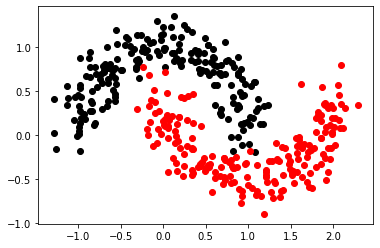

In [32]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import metrics

# helper function to visualise decision boundary, uses the svm model as input
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1
                                 ], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='gray');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# this is not necessary if you run it in the cell earlier...
#np.random.seed(Put the same or different group specific number!)

# Create a new moons data set
new_moons = datasets.make_moons(n_samples=400, noise=0.15)
Xm = new_moons[0] # data points
ym = new_moons[1] # 0, 1 labels of class, 200 each - giving us the ground truth

# Visualise the data set
order_ind = np.argsort(ym) # order labels, 200 each class
Xm1 = Xm[order_ind[0:200]]   # class 1 - only for visualisation
Xm2 = Xm[order_ind[201:400]] # class 2 - only for visualisation
plt.figure()
plt.scatter(Xm1[:,0], Xm1[:,1], color='black')
plt.scatter(Xm2[:,0], Xm2[:,1], color='red')
plt.show()

### Question 4.1.  Binary SVM Classifiers (6 pts)

First divide the data $(Xm,ym)$ to training and test sets using the default ratio. The range of data values is OK so you can skip data normalisation for this one.

1. Try an [SVM classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) with a linear kernel and different C parameters. Plot the test output and boundary. Discuss your observations and comment on linear separability of this data. Provide the precision, recall, and F-score metrics. *Hint: see [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics), especially [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)*
2. Next, use an [RBF kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) and repeat the first part for different C and gamma parameters. Do you observe an improvement compared to linear version (both visually and in terms of scores)? Discuss your results.
3. Perform a cross-validated grid-search over a parameter grid to find good C and gamma hyper-parameters. Plot the AUC ('mean_train_AUC') vs gamma for the best C. *Hint: check [GridSearchCV](https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py) and [scoring parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter). Note that you should use semi-log plot!*

$Question\;4.1.1$

Change c:

c = 0.010000

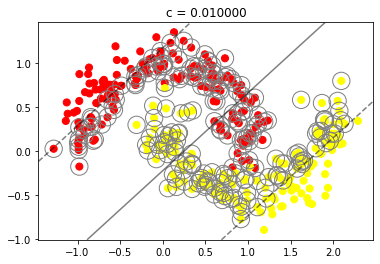

train:
              precision    recall  f1-score   support

     class 1       0.82      0.79      0.81       149
     class 2       0.80      0.83      0.81       151

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300

test:
              precision    recall  f1-score   support

     class 1       0.75      0.88      0.81        51
     class 2       0.85      0.69      0.76        49

    accuracy                           0.79       100
   macro avg       0.80      0.79      0.79       100
weighted avg       0.80      0.79      0.79       100



c = 0.100000

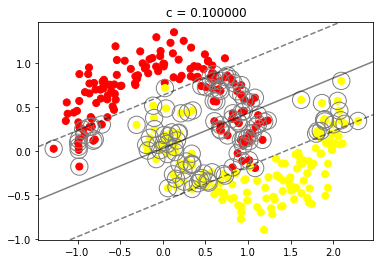

train:
              precision    recall  f1-score   support

     class 1       0.86      0.84      0.85       149
     class 2       0.84      0.86      0.85       151

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

test:
              precision    recall  f1-score   support

     class 1       0.81      0.92      0.86        51
     class 2       0.90      0.78      0.84        49

    accuracy                           0.85       100
   macro avg       0.86      0.85      0.85       100
weighted avg       0.86      0.85      0.85       100



c = 1.000000

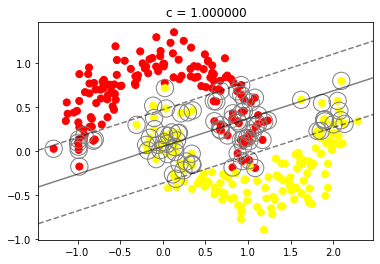

train:
              precision    recall  f1-score   support

     class 1       0.85      0.86      0.85       149
     class 2       0.86      0.85      0.85       151

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

test:
              precision    recall  f1-score   support

     class 1       0.81      0.92      0.86        51
     class 2       0.90      0.78      0.84        49

    accuracy                           0.85       100
   macro avg       0.86      0.85      0.85       100
weighted avg       0.86      0.85      0.85       100



c = 10.000000

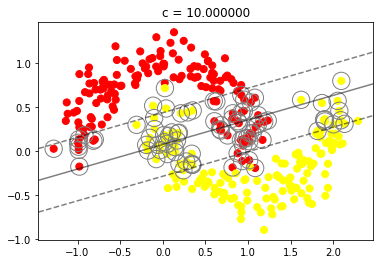

train:
              precision    recall  f1-score   support

     class 1       0.86      0.86      0.86       149
     class 2       0.86      0.87      0.86       151

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

test:
              precision    recall  f1-score   support

     class 1       0.81      0.92      0.86        51
     class 2       0.90      0.78      0.84        49

    accuracy                           0.85       100
   macro avg       0.86      0.85      0.85       100
weighted avg       0.86      0.85      0.85       100



c = 100.000000

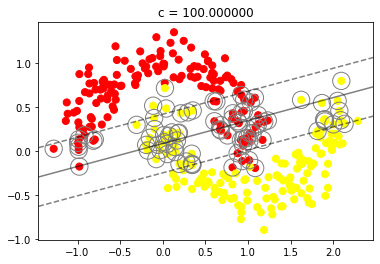

train:
              precision    recall  f1-score   support

     class 1       0.86      0.85      0.86       149
     class 2       0.86      0.87      0.86       151

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

test:
              precision    recall  f1-score   support

     class 1       0.81      0.94      0.87        51
     class 2       0.93      0.78      0.84        49

    accuracy                           0.86       100
   macro avg       0.87      0.86      0.86       100
weighted avg       0.87      0.86      0.86       100



$Question\;4.1.2$

Change c:

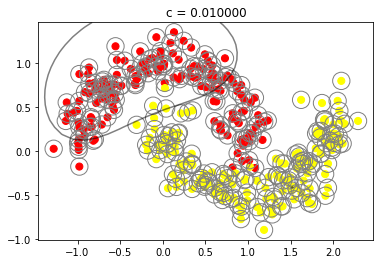

train:
              precision    recall  f1-score   support

     class 1       0.97      0.68      0.80       149
     class 2       0.76      0.98      0.85       151

    accuracy                           0.83       300
   macro avg       0.86      0.83      0.83       300
weighted avg       0.86      0.83      0.83       300

test:
              precision    recall  f1-score   support

     class 1       0.95      0.75      0.84        51
     class 2       0.78      0.96      0.86        49

    accuracy                           0.85       100
   macro avg       0.87      0.85      0.85       100
weighted avg       0.87      0.85      0.85       100



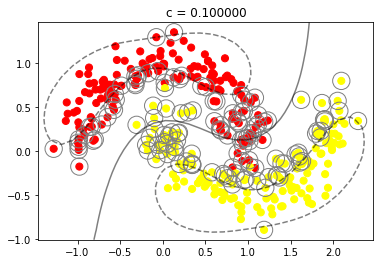

train:
              precision    recall  f1-score   support

     class 1       0.95      0.95      0.95       149
     class 2       0.95      0.95      0.95       151

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

test:
              precision    recall  f1-score   support

     class 1       0.91      0.96      0.93        51
     class 2       0.96      0.90      0.93        49

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



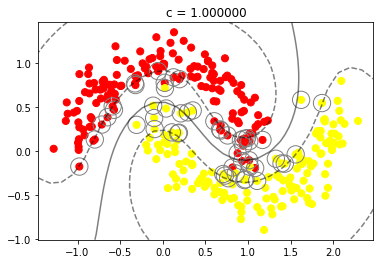

train:
              precision    recall  f1-score   support

     class 1       0.98      0.97      0.98       149
     class 2       0.97      0.98      0.98       151

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

test:
              precision    recall  f1-score   support

     class 1       0.96      1.00      0.98        51
     class 2       1.00      0.96      0.98        49

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



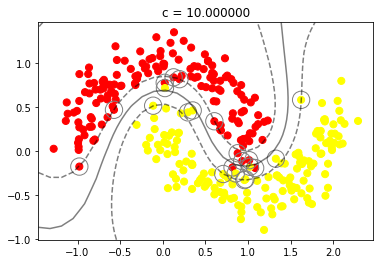

train:
              precision    recall  f1-score   support

     class 1       0.99      0.99      0.99       149
     class 2       0.99      0.99      0.99       151

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

test:
              precision    recall  f1-score   support

     class 1       0.96      1.00      0.98        51
     class 2       1.00      0.96      0.98        49

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



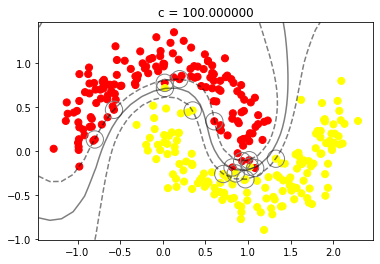

train:
              precision    recall  f1-score   support

     class 1       0.99      0.99      0.99       149
     class 2       0.99      0.99      0.99       151

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

test:
              precision    recall  f1-score   support

     class 1       0.96      1.00      0.98        51
     class 2       1.00      0.96      0.98        49

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



Change $\gamma$:

$\gamma$ = 0.010000

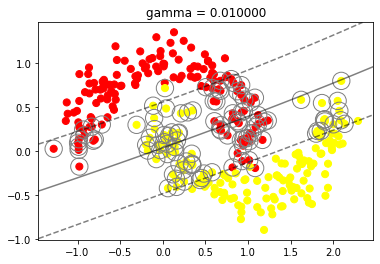

train:
              precision    recall  f1-score   support

     class 1       0.86      0.85      0.85       149
     class 2       0.85      0.86      0.86       151

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

test:
              precision    recall  f1-score   support

     class 1       0.81      0.92      0.86        51
     class 2       0.90      0.78      0.84        49

    accuracy                           0.85       100
   macro avg       0.86      0.85      0.85       100
weighted avg       0.86      0.85      0.85       100



$\gamma$ = 0.100000

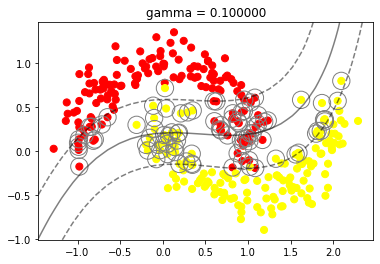

train:
              precision    recall  f1-score   support

     class 1       0.92      0.92      0.92       149
     class 2       0.92      0.92      0.92       151

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

test:
              precision    recall  f1-score   support

     class 1       0.88      0.96      0.92        51
     class 2       0.95      0.86      0.90        49

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



$\gamma$ = 1.000000

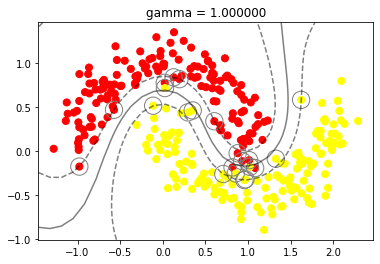

train:
              precision    recall  f1-score   support

     class 1       0.99      0.99      0.99       149
     class 2       0.99      0.99      0.99       151

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

test:
              precision    recall  f1-score   support

     class 1       0.96      1.00      0.98        51
     class 2       1.00      0.96      0.98        49

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



$\gamma$ = 10.000000

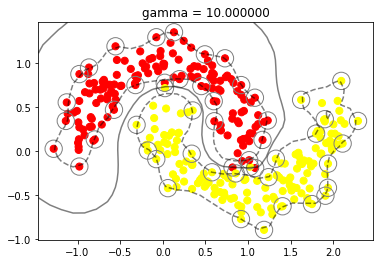

train:
              precision    recall  f1-score   support

     class 1       0.99      0.99      0.99       149
     class 2       0.99      0.99      0.99       151

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

test:
              precision    recall  f1-score   support

     class 1       0.98      1.00      0.99        51
     class 2       1.00      0.98      0.99        49

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



$\gamma$ = 100.000000

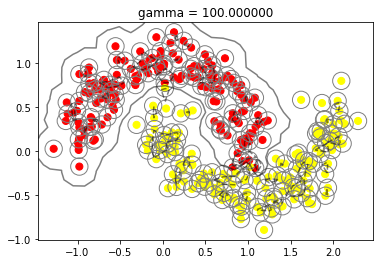

train:
              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       149
     class 2       1.00      1.00      1.00       151

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

test:
              precision    recall  f1-score   support

     class 1       0.98      1.00      0.99        51
     class 2       1.00      0.98      0.99        49

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



$Question\;4.1.3$

Best parameters set found on development set:

{'C': 77.4263682681127, 'gamma': 0.5994842503189409, 'kernel': 'rbf'}



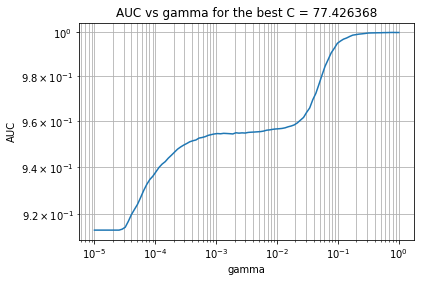

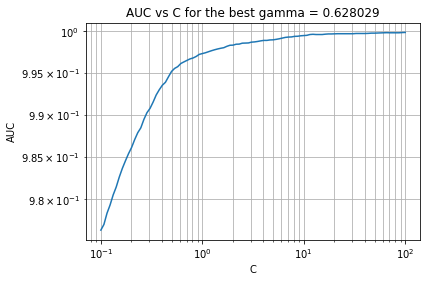

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

## Problem 4.1.1
display(Markdown(r"$Question\;4.1.1$"))

# Split into training and test sets
c = np.logspace(-2, 2, num=5)
gamma = np.logspace(-2, 2, num=5)
Xmtrain, Xmtest, ymtrain, ymtest = train_test_split(Xm, ym)

# Change c
display(Markdown(r"Change c:"))

for ci in c:
    display(Markdown(r"c = %f"%(ci)))

    model = SVC(kernel='linear', C=ci)
    model.fit(Xmtrain, ymtrain)
    ymtrainpred = model.predict(Xmtrain)
    ymtestpred = model.predict(Xmtest)

    # Plot
    plt.scatter(Xmtrain[:, 0], Xmtrain[:, 1], c=ymtrain, s=50, cmap='autumn')
    plot_svc_decision_function(model)
    plt.title('c = %f' % ci)
    plt.show()
    
    # Classification report
    train_target_names = ['class 1', 'class 2']
    test_target_names = ['class 1', 'class 2']
    print('train:')
    print(classification_report(ymtrain, ymtrainpred, target_names=train_target_names))
    print('test:')
    print(classification_report(ymtest, ymtestpred, target_names=test_target_names))
######################################################################################################################



######################################################################################################################
## Problem 4.1.2
display(Markdown(r"$Question\;4.1.2$"))

# Change c
display(Markdown(r"Change c:"))

for ci in c:
    model = SVC(kernel='rbf', C=ci, gamma=1)
    model.fit(Xmtrain, ymtrain)
    ymtrainpred = model.predict(Xmtrain)
    ymtestpred = model.predict(Xmtest)

    # Plot
    plt.scatter(Xmtrain[:, 0], Xmtrain[:, 1], c=ymtrain, s=50, cmap='autumn')
    plot_svc_decision_function(model)
    plt.title('c = %f' % ci)
    plt.show()
    
    # Classification report
    train_target_names = ['class 1', 'class 2']
    test_target_names = ['class 1', 'class 2']
    print('train:')
    print(classification_report(ymtrain, ymtrainpred, target_names=train_target_names))
    print('test:')
    print(classification_report(ymtest, ymtestpred, target_names=test_target_names))
        
# Change gamma
display(Markdown(r"Change $\gamma$:"))
for gammai in gamma:
    display(Markdown(r"$\gamma$ = %f"%(gammai)))

    model = SVC(kernel='rbf', C=10, gamma=gammai)
    model.fit(Xmtrain, ymtrain)
    ymtrainpred = model.predict(Xmtrain)
    ymtestpred = model.predict(Xmtest)

    # Plot
    plt.scatter(Xmtrain[:, 0], Xmtrain[:, 1], c=ymtrain, s=50, cmap='autumn')
    plot_svc_decision_function(model)
    plt.title('gamma = %f' % gammai)
    plt.show()
    
    # Classification report
    train_target_names = ['class 1', 'class 2']
    test_target_names = ['class 1', 'class 2']
    print('train:')
    print(classification_report(ymtrain, ymtrainpred, target_names=train_target_names))
    print('test:')
    print(classification_report(ymtest, ymtestpred, target_names=test_target_names))
######################################################################################################################



######################################################################################################################
## Problem 4.1.3
display(Markdown(r"$Question\;4.1.3$"))

# Find good C and gamma
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.logspace(-1, 0, num=10), 'C': np.logspace(1, 3, num=10)}]
gs = GridSearchCV(SVC(), param_grid=tuned_parameters, scoring={'AUC': 'roc_auc'}, refit='AUC', return_train_score=True)
gs.fit(Xmtrain, ymtrain)
results = gs.cv_results_

print("Best parameters set found on development set:")
print()
print(gs.best_params_)
print()

# Tune for gamma
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.logspace(-5, 0, num=100), 'C': [gs.best_params_['C']]}]
gs = GridSearchCV(SVC(), param_grid=tuned_parameters, scoring={'AUC': 'roc_auc'}, refit='AUC', return_train_score=True)
gs.fit(Xmtrain, ymtrain)
results = gs.cv_results_
aucs = gs.cv_results_['mean_train_AUC']

# Semilog plot
plt.grid(True, which="both")
plt.loglog(np.logspace(-5, 0, num=100), aucs)
plt.title('AUC vs gamma for the best C = %f' %gs.best_params_['C'])
plt.xlabel('gamma')
plt.ylabel('AUC')
plt.show()

# Tune for C
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [gs.best_params_['gamma']], 'C': np.logspace(-1, 2, num=100)}]
gs = GridSearchCV(SVC(), param_grid=tuned_parameters, scoring={'AUC': 'roc_auc'}, refit='AUC', return_train_score=True)
gs.fit(Xmtrain, ymtrain)
results = gs.cv_results_
aucs = gs.cv_results_['mean_train_AUC']

# Semilog plot
plt.grid(True, which="both")
plt.loglog(np.logspace(-1, 2, num=100), aucs)
plt.title('AUC vs C for the best gamma = %f' %gs.best_params_['gamma'])
plt.xlabel('C')
plt.ylabel('AUC')
plt.show()

1. The test output and boundary plot with a linear kernel and different C parameters are shown above. <br/>
The precision, recall, and F-score metrics are also shown above. In a linear kernel, the dividing line maximizes the margin between the two classes of points. These training points just touching the margin indicated by the black circles are called the support vectors. <br/>
From these results, the SVM classifier improves as we increase C parameter with a linear kernel. <br/>
The C parameter tells the SVM how strict you want to avoid strict classification. For a larger value of C, the margin is hard, and the optimization will select a hyperplane with no points in the margin. Conversely, even if the hyperplane misclassifies more points, a smaller C value will cause the optimizer to find a larger interval to separate the hyperplane.
2. When we apply an RBF kernel, there is an improvement compared to the linear version. <br/>
The RBF kernel calculates the radial basis centered on the middle block, which helps us project the data to higher dimensions, so that the linear separator is sufficient. <br/>
From these results, the SVM classifier improves as we increase either C or $\gamma$ parameter with a RBF kernel. <br/>
As mentioned before, the C parameter is the penalty parameter of the error term. It trades off correct classification of training examples against maximization of the decision function’s margin. <br/>
The gamma parameter defines how far the influence of a single training example reaches. With a higher gamma value, it tries to exactly fit the training data set which would even cause overfit. 
3. The good C and gamma hyperparameters:<br/>
'C': 77.4263682681127, 'gamma': 0.5994842503189409 <br/>
The plot of AUC ('mean_train_AUC') vs gamma for the best C and AUC ('mean_train_AUC') vs C for the best gamma are shown above.

# Section 5: Logistic Regression

Logistic regression uses a linear statistical model. It measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function. It is also used for classification. Let's start with a very simple example to **visualise the logistic function**.

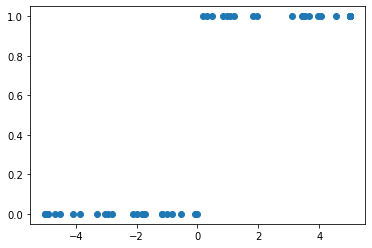

In [34]:
# Generate a toy dataset

toy_samples = 50
X_toy = np.linspace(-5, 5, toy_samples)
Xtoy_test = np.linspace(-5, 5, 200)
# gaussian noise added
X_toy = X_toy + 2*np.random.normal(size=toy_samples)
# upper, lower bound
X_toy = np.clip(X_toy,-5, 5).reshape(-1,1)
# create labels
y_toy = ((np.sign(X_toy)+1)/2.0).ravel()

# visualise
plt.figure()
plt.scatter(X_toy, y_toy)
plt.show()

### Question 5.1.  Simple Logistic Regression (LR) (2 pts)

1. (1 pt) Fit a logistic and linear regression model to the data *(X_toy, y_toy)*. Find the logistic and linear model coefficients and bias *(trained_model.coef_, trained_model.intercept_)*. Hint: check [Sklearn logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
2. (1 pts) Test your models on a simple test set {Xtoy_test} given above. Plot your results and discuss.

1. The coefficients and bias of logistic and linear regression model are shown below.
2. Linear regression is used to deal with regression problems, while logistic regression is used to deal with classification problems. The purpose of linear regression is to find the best fitting line while Logistic regression is one step ahead, and to fit the line value to the S-shaped curve. <br/>
In this example, what we need is to classify the toy data, so it is better to choose logistic regression. For linear regression, if the input is too large or small, the output value will be outside of 0 to 1, which obviously does not meet expectations. So for toy classification, logic is more appropriate.

$Question\;5.1.1$

For logistic regression:

coefficient $ = 1.949863$

intercept $ = -0.277617$

$y = \dfrac{1}{1 + e^{-(-0.277617 + 1.949863 \cdot X)}}$

MSE $_{lg} = 0.000000$

For linear regression:

coefficient $ = 0.130616$

intercept $ = 0.457961$

$y = 0.457961 + 0.130616 \cdot X$

MSE $_{reg} = 0.067965$

$Question\;5.1.2$

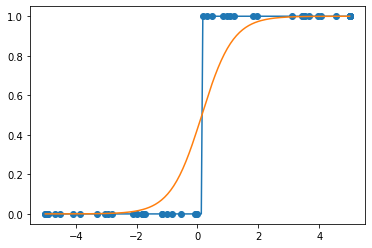

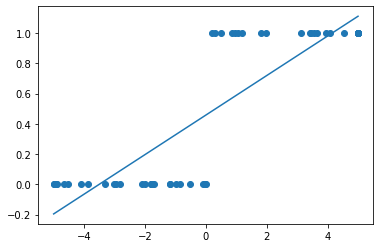

In [35]:
from sklearn.linear_model import LogisticRegression

## Problem 5.1.1
display(Markdown(r"$Question\;5.1.1$"))

# Logistic
lg = LogisticRegression(random_state=3698557).fit(X_toy, y_toy)
# y_toyPred = 1/(1+np.exp(-(lg.intercept_ + lg.coef_ * X_toy)))
y_toyPred = lg.predict(X_toy)
mse_lg = mean_squared_error(y_toy, y_toyPred)

# Display
display(Markdown(r"For logistic regression:"))
display(Markdown(r"coefficient $ = %f$"%(lg.coef_)))
display(Markdown(r"intercept $ = %f$"%(lg.intercept_)))
display(Markdown(r"$y = \dfrac{1}{1 + e^{-(%f + %f \cdot X)}}$"%(lg.intercept_, lg.coef_)))
display(Markdown(r"MSE $_{lg} = %f$"%(mse_lg)))

# Linear
reg = linear_model.LinearRegression().fit(X_toy, y_toy)
y_toyPred = reg.predict(X_toy)
mse_reg = mean_squared_error(y_toy, y_toyPred)

# Display
display(Markdown(r"For linear regression:"))
display(Markdown(r"coefficient $ = %f$"%(reg.coef_)))
display(Markdown(r"intercept $ = %f$"%(reg.intercept_)))
display(Markdown(r"$y = %f + %f \cdot X$"%(reg.intercept_, reg.coef_)))
display(Markdown(r"MSE $_{reg} = %f$"%(mse_reg)))

######################################################################################################################



######################################################################################################################
## Problem 5.1.2
display(Markdown(r"$Question\;5.1.2$"))

# Logistic
ytoy_testPred_origin = 1/(1+np.exp(-(lg.intercept_ + lg.coef_ * Xtoy_test[:, np.newaxis])))
ytoy_testPred = lg.predict(Xtoy_test[:, np.newaxis])

# visualise
plt.figure()
plt.plot(Xtoy_test, ytoy_testPred)
plt.plot(Xtoy_test, ytoy_testPred_origin)
plt.scatter(X_toy, y_toy)
plt.show()

# Linear
ytoy_testPred = reg.predict(Xtoy_test[:, np.newaxis])

# visualise
plt.figure()
plt.plot(Xtoy_test, ytoy_testPred)
plt.scatter(X_toy, y_toy)
plt.show()

## 5.2 *Example*. Electrical Grid Stability with Simulated Data

This simulated [dataset](http://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+) is related to local stability of a 4-node star system (electricity producer is in the center), which implements a decentralised Smart Grid Control concept. 

>Arzamasov, Vadim, Klemens Boehm, and Patrick Jochem. ['Towards Concise Models of Grid Stability.'](https://dbis.ipd.kit.edu/download/DSGC_simulations.pdf) Communications, Control, and Computing Technologies for Smart Grids (SmartGridComm), 2018 IEEE International Conference on. IEEE, 2018 

*Note that, in many engineering applications such datasets can be generated through simulations (easy) or experimentation (harder). Different from classical ML applications, engineers often have a very good understanding of the underlying physical models, which gives a unique advantage. We will, however, keep it simple in this workshop and use the dataset as is.*

Let's load and process the dataset.

In [36]:
griddata=pd.read_csv('files/Data_for_UCI_named.csv')
griddata.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [37]:
Xgrid = griddata.iloc[:, 0:12] # note that the Column 13 has the answer!
Xgrid.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923


In [38]:
ygrid = griddata.iloc[:, 13]
# 0 if unstable and 1 if stable
ygrid = [ 0 if x=='unstable' else 1 for x in ygrid]

print("prepared data: ",Xgrid[0:5], ygrid[0:5])

prepared data:         tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  
1 -1.255012  0.413441  0.862414  0.562139  0.781760  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  
4 -0.554305  0.797110  0.455450  0.656947  0.820923   [0, 1, 0, 0, 0]


### Question 5.3.  Checking Grid Stability using Logistic Regression (LR)  (6 pts)

Now, we can use the simulated dataset *(Xgrid,ygrid)* to check grid stability. We will use first logistic regression for this purpose. Unfortunately, it is not possible to directly visualise this dataset, so we have to use performance metrics.

1. (1 pt) Preprocess and normalise *Xgrid* using a [*sklearn.preprocessing*](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing). You can use, for example, *StandardScaler* or *MinMaxScaler*.
2. (2 pts) Train a logistic regression model that classifies the grid as stable or not, based on input *Xgrid*. Don't forget to divide *Xgrid* into training and test sets. Quantify the performance of LR using standard metrics such as accuracy, precision, recall, and f1 score on the test set. Plot the [ROC curve](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). How do these change w.r.t. [parameter C](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)? Discuss your observations.
3. (2 pts) What are the coefficients of the LR that you trained? What do they tell you about the impact of independent input variables on the dependent output variable *ygrid*? Discuss. *Hint: you can use [regressors package](https://regressors.readthedocs.io/en/latest/index.html) stats function to calculate p-values. See, e.g. [this](http://www.r-tutor.com/elementary-statistics/logistic-regression/significance-test-logistic-regression) or [this](http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients) for info.* 
4. (1 pts) Use a nonlinear SVM, e.g. with rbf kernel, to solve the problem. Quantify the performance of SVM classifier and compare with LR one. Discuss your findings.

1. Preprocess and normalise Xgrid with StandardScale.
2. The test output and ROC curve different C parameters are shown below. As shown in the plots and test outputs, there are very slight differences between the performance with respect to different C. As logistic regression is linear, this algorithm can't change much the classification model as the data is not linearly separated.
3. coefficient  = [-0.88438374 -0.8888006  -0.824225   -0.89886241 -0.00574197 -0.00428065  -0.0272969   0.04155106 -0.73034734 -0.80080128 -0.83625155 -0.80588478]. <br/>
intercept = −1.043261 <br/>
p = [0.         0.         0.         0.         0.         0.99999999 0.99999999 0.99999992 0.99999988 0.        0.         0.        0.        ] <br/>
As p[0], p[1], p[2], p[3], p[4], p[9], p[10], p[11], p[12] < 0.05, these coefficients are not significant in the logistic regression model. <br/>
As p[5], p[6], p[7], p[8]  > 0.05, these coefficients are significant in the logistic regression model.
4. The performance of SVM classifier is shown below. As we can see, SVM with a rbf kernel does better than LR one. This is because for non-linearly separable problems, RBF SVM can learn the non-linearities in the data while logistic regression cannot .

$Question\;5.3.1$

prepared data:  [[-0.83537431 -0.79131661  1.14170354  1.65210289  0.01739718  1.0794055
  -0.01707819 -1.09254499  0.45746733  1.22001311  1.32162751  1.57902607]
 [ 1.47829663 -0.12670487 -0.80311147 -1.41504291  1.75212436 -1.59361879
  -1.43815844 -0.01157525 -0.40679143  1.23035426  0.13542358  0.93625569]
 [ 1.35709296  1.31213982 -0.80349871 -1.47150374 -0.45849151  0.09825304
  -0.06283962  0.76096342 -1.3198525   0.88129868  1.14659574 -1.51380226]
 [-1.65313833  0.88228867 -0.27835446 -1.06090088  0.28425038  0.51390386
  -1.59104623  0.58341424 -0.2873044   1.64725009  1.47454259 -0.59175046]
 [-0.77154307  0.86010818 -0.11166965  1.68011424 -0.2980753   0.28744967
  -1.3763432   1.60663583  0.99222554 -0.25361001  0.48113255  1.07906277]] [0, 1, 0, 0, 0]


$Question\;5.3.2$

C = 0.001000

test:
              precision    recall  f1-score   support

    unstable       0.80      0.94      0.86      1612
      stable       0.84      0.58      0.68       888

    accuracy                           0.81      2500
   macro avg       0.82      0.76      0.77      2500
weighted avg       0.81      0.81      0.80      2500



C = 1.778279

test:
              precision    recall  f1-score   support

    unstable       0.84      0.87      0.85      1612
      stable       0.75      0.70      0.72       888

    accuracy                           0.81      2500
   macro avg       0.79      0.79      0.79      2500
weighted avg       0.81      0.81      0.81      2500



C = 3162.277660

test:
              precision    recall  f1-score   support

    unstable       0.84      0.87      0.85      1612
      stable       0.75      0.70      0.72       888

    accuracy                           0.81      2500
   macro avg       0.79      0.79      0.79      2500
weighted avg       0.81      0.81      0.81      2500



C = 5623413.251903

test:
              precision    recall  f1-score   support

    unstable       0.84      0.87      0.85      1612
      stable       0.75      0.70      0.72       888

    accuracy                           0.81      2500
   macro avg       0.79      0.79      0.79      2500
weighted avg       0.81      0.81      0.81      2500



C = 10000000000.000000

test:
              precision    recall  f1-score   support

    unstable       0.84      0.87      0.85      1612
      stable       0.75      0.70      0.72       888

    accuracy                           0.81      2500
   macro avg       0.79      0.79      0.79      2500
weighted avg       0.81      0.81      0.81      2500



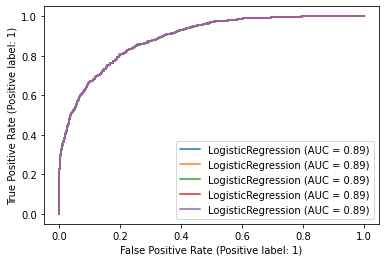

$Question\;5.3.3$

coefficient $ = $

[[-0.88438374 -0.8888006  -0.824225   -0.89886241 -0.00574197 -0.00428065
  -0.0272969   0.04155106 -0.73034734 -0.80080128 -0.83625155 -0.80588478]]


intercept $ = -1.043261$

'p='

[0.         0.         0.         0.         0.         0.99999999
 0.99999999 0.99999992 0.99999988 0.         0.         0.
 0.        ]


$Question\;5.3.4$

              precision    recall  f1-score   support

    unstable       0.98      0.98      0.98      4768
      stable       0.97      0.96      0.96      2732

    accuracy                           0.97      7500
   macro avg       0.97      0.97      0.97      7500
weighted avg       0.97      0.97      0.97      7500

              precision    recall  f1-score   support

    unstable       0.96      0.97      0.97      1612
      stable       0.95      0.92      0.94       888

    accuracy                           0.95      2500
   macro avg       0.95      0.95      0.95      2500
weighted avg       0.95      0.95      0.95      2500



In [39]:
from sklearn.preprocessing import StandardScaler
from regressors.stats import coef_pval

## Question 5.3.1
display(Markdown(r"$Question\;5.3.1$"))

Xgridfulldata = np.array(Xgrid.values)

# Normalise data
scaler = StandardScaler()
scaler.fit(Xgridfulldata)
Xgridscaled = scaler.transform(Xgridfulldata)
print("prepared data: ",Xgridscaled[0:5], ygrid[0:5])
######################################################################################################################



######################################################################################################################
## Problem 5.3.2
display(Markdown(r"$Question\;5.3.2$"))

# Split into training and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(Xgridscaled, ygrid, random_state=3698557)

# Logistic
C = np.logspace(-3, 10, 5)
fig, ax = plt.subplots()
for c in C:
    display(Markdown(r"C = %f" % (c)))
    lg = LogisticRegression(random_state=3625557, C=c).fit(Xtrain, ytrain)
    ytrainPred = lg.predict(Xtrain)
    ytestPred = lg.predict(Xtest)

    # Classification report
    train_target_names = ['unstable', 'stable']
    test_target_names = ['unstable', 'stable']
    #print('train:')
    #print(classification_report(ytrain, np.squeeze(ytrainPred).T, target_names=train_target_names))
    print('test:')
    print(classification_report(ytest, np.squeeze(ytestPred).T, target_names=test_target_names))

    # Plot ROC curve
    metrics.plot_roc_curve(lg, Xtest, ytest, ax=ax)

plt.show()
######################################################################################################################



######################################################################################################################
## Problem 5.3.3
display(Markdown(r"$Question\;5.3.3$"))

# Logistic
lg = LogisticRegression(random_state=3698557).fit(Xtrain, ytrain)

# P value
p = coef_pval(lg, Xtest, ytest)

# Display
display(Markdown(r"coefficient $ = $"))
print(lg.coef_)
display(Markdown(r"intercept $ = %f$"%(lg.intercept_)))
display("p=")
print(p)
######################################################################################################################



######################################################################################################################
## Problem 5.3.4
display(Markdown(r"$Question\;5.3.4$"))

# SVM
model = SVC(kernel='rbf')
model.fit(Xtrain, ytrain)
ytrainpred = model.predict(Xtrain)
ytestpred = model.predict(Xtest)

# Classification report
train_target_names = ['unstable', 'stable']
test_target_names = ['unstable', 'stable']
print(classification_report(ytrain, ytrainpred, target_names=train_target_names))
print(classification_report(ytest, ytestpred, target_names=test_target_names))


## 6 Mini Project: Communications Detective (10 pts)

Your job as a detective is to distinguish malicious people's communications from background civilian communication traffic. As a 21st century detective, you have access to a cognitive radio network and you have ML knowledge!

The [dataset](files/svm_bonus_data.csv) is collected from a simulation where there are multiple malicious people and civilians communicating in a region with multiple passive cognitive radio nodes.
Data about each transmission source is collected from the listener nearest to it. The objective is to classify if a transmission source is an rogue agent or a civilian based on the data.

<img align="left" src="img/detective.png" width="200" hspace="20"/>      <img align="center" src="img/omnet.png" width="400" hspace="20"/>

The data file contains data from 2 classes:
 * civilians - 129 instances (labeled as +1)
 * rogue agents - 129 instances (labeled as -1)

**Features/attributes** are **not** normalised.
1. label 2. carrier_frequency 2. bandwidth 3. bitrate 4. session duration 5. message_length 6. inter-arrival time (iat)

This is an open-ended mini-project. However, for full points, you should consider:
1. Normalise and investigate the data, try e.g. PCA.
2. Try multiple classifiers, e.g. SVM and logistic regression, find their hyper-parameters.
3. Do cross validation, give performance results using metrics, compare/contrast methods.
4. Discuss your findings based on your theoretical/practical knowledge.

cumulative variance
[0.72689954 0.84439555 0.94917897 0.98170741 1.        ]


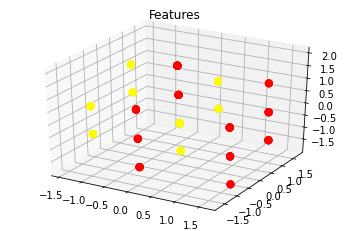

K-means

Kmeans centres $_{1} =$

[ 0.68510918  0.57046007 -0.40701567]


Kmeans centres $_{2} =$

[-0.60416525 -0.45222439  0.34027295]


MSE $_{train} = 0.564767$

MSE $_{test} = 0.476923$

scores $_{train} =$

[0.43589744 0.58974359 0.02564103 0.5        0.63157895]
              precision    recall  f1-score   support

rogue agents       0.57      0.49      0.52        35
   civilians       0.49      0.57      0.52        30

    accuracy                           0.52        65
   macro avg       0.53      0.53      0.52        65
weighted avg       0.53      0.52      0.52        65



Gaussian Mixture Models

MSE $_{train} = 0.445596$

MSE $_{test} = 0.461538$

scores $_{train} =$

[0.92307692 0.97435897 0.76923077 0.65789474 0.78947368]
              precision    recall  f1-score   support

rogue agents       0.55      0.74      0.63        35
   civilians       0.50      0.30      0.37        30

    accuracy                           0.54        65
   macro avg       0.53      0.52      0.50        65
weighted avg       0.53      0.54      0.51        65



SVM

MSE $_{train} = 0.010363$

MSE $_{test} = 0.061538$

scores $_{train} =$

[1.         1.         0.97435897 1.         0.97368421]
              precision    recall  f1-score   support

rogue agents       1.00      0.89      0.94        35
   civilians       0.88      1.00      0.94        30

    accuracy                           0.94        65
   macro avg       0.94      0.94      0.94        65
weighted avg       0.95      0.94      0.94        65



Logistic regression

coefficient $ =$

[[-3.32091314  2.36367141 -1.76346888]]


intercept $ = 0.023802$

MSE $_{train} = 0.010363$

MSE $_{test} = 0.061538$

scores $_{train} =$

[1.         1.         0.97435897 1.         0.97368421]
              precision    recall  f1-score   support

rogue agents       1.00      0.89      0.94        35
   civilians       0.88      1.00      0.94        30

    accuracy                           0.94        65
   macro avg       0.94      0.94      0.94        65
weighted avg       0.95      0.94      0.94        65



In [40]:
commdata=pd.read_csv('files/svm_bonus_data.csv')
commdata.head()

# np.random.seed(3698351)

# Full data in correct form for sklearn
features = np.array(commdata.values[:, 1:6]).reshape(-1, 5)  # reshape needed for sklearn functions
label = np.array(commdata.values[:, 0])  # reshape needed for sklearn functions

# Check variance
scaler = StandardScaler()
scaler.fit(features)
featuresscaled = scaler.transform(features)

pca = PCA(n_components=5)
pca.fit(featuresscaled)
featurespca = pca.transform(featuresscaled)
varsum = np.cumsum(pca.explained_variance_ratio_)
print('cumulative variance')
print(varsum)

# # Apply PCA(n = 2)
# pca = PCA(n_components=2)
# pca.fit(features)
# featurespca = pca.transform(features)

# # Normalise data
# scaler = StandardScaler()
# scaler.fit(featurespca)
# featuresscaled = scaler.transform(featurespca)
# labelscaled = (1 + label)/2

# # Plot
# plt.figure()
# plt.scatter(featuresscaled[:, 0], featuresscaled[:, 1], c=labelscaled, s=50, cmap='autumn')
# plt.title("Features")
# plt.show()

# Apply PCA(n = 3)
pca = PCA(n_components=3)
pca.fit(features)
featurespca = pca.transform(features)

# Normalise data
scaler = StandardScaler()
scaler.fit(featurespca)
featuresscaled = scaler.transform(featurespca)
labelscaled = (1 + label)/2

# Plot
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(featuresscaled[:, 0], featuresscaled[:, 1], featuresscaled[:, 2], c=labelscaled, s=50, cmap='autumn')
plt.title("Features")
plt.show()

# # Apply PCA(n = 4)
# pca = PCA(n_components=4)
# pca.fit(features)
# featurespca = pca.transform(features)

# # Normalise data
# scaler = StandardScaler()
# scaler.fit(featurespca)
# featuresscaled = scaler.transform(featurespca)
# labelscaled = (1 + label)/2

# # Plot
# fig = plt.figure()
# ax = plt.axes(projection="3d")
# ax.scatter3D(featuresscaled[:128, 0], featuresscaled[:128, 1], featuresscaled[:128, 2], c=featuresscaled[:128, 3], marker='X', s=50, cmap=plt.hot())
# ax.scatter3D(featuresscaled[129:, 0], featuresscaled[129:, 1], featuresscaled[129:, 2], c=featuresscaled[129:, 3], s=50, cmap=plt.hot())
# plt.title("Features")
# plt.show()

######################################################################################################################
######################################################################################################################

# Split into training and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(featuresscaled, labelscaled, random_state=3698157)


# ## Linear regression
# display(Markdown(r"Linear regression"))
# reg = linear_model.LinearRegression().fit(Xtrain, ytrain)

# # Coefficients
# a = reg.intercept_
# b = reg.coef_
# # Prediction
# ytrainpred = reg.predict(Xtrain)
# ytestpred = reg.predict(Xtest)
# # MSE
# mseRegTrain = mean_squared_error(ytrain, ytrainpred)
# mseRegTest = mean_squared_error(ytest, ytestpred)
# # Cross validation
# scoresKmeansTrain = cross_val_score(reg, Xtrain, ytrain)
# scoresKmeansTest = cross_val_score(reg, Xtest, ytest)
# # Display results
# display(Markdown(r"MSE $_{train} = %f$"%(mseRegTrain)))
# display(Markdown(r"MSE $_{test} = %f$"%(mseRegTest)))


# Use k-means clustering
display(Markdown(r"K-means"))
kmeans = KMeans(n_clusters=2, random_state=3321555).fit(Xtrain)

## Kmeans centroids
kmeansCentres1 = kmeans.cluster_centers_[0]
kmeansCentres2 = kmeans.cluster_centers_[1]
# Prediction
ytrainpred = kmeans.labels_
ytestpred = kmeans.predict(Xtest)
# MSE
mseKmeansTrain = mean_squared_error(ytrain, ytrainpred)
mseKmeansTest = mean_squared_error(ytest, ytestpred)
# Cross validation
scoresKmeansTrain = cross_val_score(kmeans, Xtrain, ytrain, scoring='accuracy')
# scoresKmeansTest = cross_val_score(kmeans, Xtest, ytest, scoring='accuracy')
# Display results
display(Markdown(r"Kmeans centres $_{1} =$"))
print(kmeansCentres1)
display(Markdown(r"Kmeans centres $_{2} =$"))
print(kmeansCentres2)
display(Markdown(r"MSE $_{train} = %f$"%(mseKmeansTrain)))
display(Markdown(r"MSE $_{test} = %f$"%(mseKmeansTest)))
display(Markdown(r"scores $_{train} =$"))
print(scoresKmeansTrain)
# display(Markdown(r"scores $_{test} =$"))
# print(scoresKmeansTest)
# Classification report
target_names = ['rogue agents', 'civilians']
# print(classification_report(ytrain, ytrainpred, target_names=target_names))
print(classification_report(ytest, ytestpred, target_names=target_names))


## Gaussian Mixture Models
display(Markdown(r"Gaussian Mixture Models"))
gmm = GaussianMixture(n_components=2, covariance_type="full", random_state=3667581).fit(Xtrain)
# Prediction
ytrainpred = gmm.predict(Xtrain)
ytestpred = gmm.predict(Xtest)
# MSE
mseGmmTrain = mean_squared_error(ytrain, ytrainpred)
mseGmmTest = mean_squared_error(ytest, ytestpred)
# Cross validation
scoresGmmTrain = cross_val_score(gmm, Xtrain, ytrain, scoring='accuracy')
# scoresGmmTest = cross_val_score(gmm, Xtest, ytest, scoring='accuracy')
# Display results
display(Markdown(r"MSE $_{train} = %f$"%(mseGmmTrain)))
display(Markdown(r"MSE $_{test} = %f$"%(mseGmmTest)))
display(Markdown(r"scores $_{train} =$"))
print(scoresGmmTrain)
# display(Markdown(r"scores $_{test} =$"))
# print(scoresGmmTest)
# Classification report
target_names = ['rogue agents', 'civilians']
# print(classification_report(ytrain, ytrainpred, target_names=target_names))
print(classification_report(ytest, ytestpred, target_names=target_names))


## SVM
display(Markdown(r"SVM"))
svc = SVC(kernel='linear', C=10, random_state=3698157).fit(Xtrain, ytrain)

# Prediction
ytrainpred = svc.predict(Xtrain)
ytestpred = svc.predict(Xtest)
# MSE
mseSvmTrain = mean_squared_error(ytrain, ytrainpred)
mseSvmTest = mean_squared_error(ytest, ytestpred)
# Cross validation
scoresSvmTrain = cross_val_score(svc, Xtrain, ytrain, scoring='accuracy')
# scoresSvmTest = cross_val_score(svc, Xtest, ytest, scoring='accuracy')
# Display results
display(Markdown(r"MSE $_{train} = %f$"%(mseSvmTrain)))
display(Markdown(r"MSE $_{test} = %f$"%(mseSvmTest)))
display(Markdown(r"scores $_{train} =$"))
print(scoresSvmTrain)
# display(Markdown(r"scores $_{test} =$"))
# print(scoresSvmTest)
# Classification report
target_names = ['rogue agents', 'civilians']
# print(classification_report(ytrain, ytrainpred, target_names=target_names))
print(classification_report(ytest, ytestpred, target_names=target_names))


## Logistic regression
display(Markdown(r"Logistic regression"))
lg = LogisticRegression(random_state=3698558).fit(Xtrain, ytrain)

# Coefficients
coefficients = lg.coef_
intercept = lg.intercept_
# Prediction
ytrainpred = lg.predict(Xtrain)
ytestpred = lg.predict(Xtest)
# MSE
mseLgTrain = mean_squared_error(ytrain, ytrainpred)
mseLgTest = mean_squared_error(ytest, ytestpred)
# Cross validation
scoresLgTrain = cross_val_score(lg, Xtrain, ytrain, scoring='accuracy')
# scoresLgTest = cross_val_score(lg, Xtest, ytest, scoring='accuracy')
# Display results
display(Markdown(r"coefficient $ =$"))
print(lg.coef_)
display(Markdown(r"intercept $ = %f$"%(lg.intercept_)))
display(Markdown(r"MSE $_{train} = %f$"%(mseLgTrain)))
display(Markdown(r"MSE $_{test} = %f$"%(mseLgTest)))
display(Markdown(r"scores $_{train} =$"))
print(scoresLgTrain)
# display(Markdown(r"scores $_{test} =$"))
# print(scoresLgTest)
# Classification report
target_names = ['rogue agents', 'civilians']
# print(classification_report(ytrain, ytrainpred, target_names=target_names))
print(classification_report(ytest, ytestpred, target_names=target_names))

Discussion: <br/>
From the cumulative variance of dimensions [0.72689954 0.84439555 0.94917897 0.98170741 1.        ], we can use 3 components for PCA as there cumulative variance is about 95%. Then we apply PCA and normalisation on the data. <br/>
<br/>
We use k-means, Gaussian Mixture Models, SVM, and Logistic regression to classify with 2 clusters. The performance results are shown above. <br/>
<br/>
From these results, we can find k-means and Gaussian Mixture Models do not perform well since  there is no assurance that they will converge to the global best solution. In particular, the boundaries between k-means clusters will always be linear, which means it will not be able to handle more complex boundaries. Also, the are not suitable for classifying features with high components.<br/>
<br/>
For the last two methods, SVM and Logistic regression clustering, they both do well in classify the features data as there MSE is really low and accuracy is really high. SVM tries to finds the “best” margin (distance between the line and the support vectors) that separates the classes and this reduces the risk of error on the data, while logistic regression does not, instead it can have different decision boundaries with different weights that are near the optimal point. In this example, due of the features, Logistic regression and SVM with a linear kernel have similar performance. Thus we can choose either of them to do the classification with a good performance.

# <font color='red'> Workshop Report Submission Instructions </font>

_You should ideally complete the workshop tasks on time and attend respective session to get help from your demonstrator!_ **Submission deadlines will be announced on Canvas.**

It is **mandatory to follow all of the submissions guidelines** given below. _Don't forget the Report submission information on top of this notebook!_

1. The completed Jupyter notebook and its Pdf version (you can simply print-preview and then print as pdf from within your browser) should be uploaded to the right place in Canvas by the announced deadline. _It is your responsibility to follow the announcements!_ **Late submissions will be penalised (up to 100% of the total mark depending on delay amount)!**
2. Filename should be “ELEN90088 Workshop **W: StudentID1-StudentID2** of session **Day-Time**", where **W** refers to the workshop number, **StudentID1-StudentID2** are your student numbers, **Day-Time** is your session day and time, e.g. *Tue-14*.
3. Answers to questions, simulation results and diagrams should be included in the Jupyter notebook as text, code, plots. *If you don't know latex, you can write formulas/text to a paper by hand, scan it and then include as image within Markdown cells.*
4. One report submission per group. 
 
### Additional guidelines for your programs:

* Write modular code using functions. 
* Properly indent your code. But Python forces you do that anyway ;)
* Heavily comment the code to describe your implementation and to show your understanding. No comments, no credit!
* Make the code your own! It is encouraged to find and get inspired by online examples but you should exactly understand, modify as needed, and explain your code via comments. There will be no credit for blind copy/paste even if it somehow works (and it is easier to detect it than you might think)!